# Dataset Description

**Introduction**

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US
Census database.


**Exploratory Analysis**


The Census Income dataset has 48,842 entries. Each entry contains the following information
about an individual:


● age​: the age of an individual
      
    
*   Integer greater than 0

● workclass​: a general term to represent the employment status of an individual

*   Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.


● fnlwgt​: final weight. In other words, this is the number of people the census believes
the entry represents..

*   Integer greater than 0

● education​: the highest level of education achieved by an individual.

*    Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

● education­num​: the highest level of education achieved in numerical form.

*   Integer greater than 0


● marital­status​: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.

*    Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.


● occupation​: the general type of occupation of an individual

*   Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.


● relationship​: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all

*   Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.


● race​: Descriptions of an individual’s race

*   White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.


● sex​: the biological sex of the individual

*   Male, Female


● capital­gain​: capital gains for an individual

*   Integer greater than or equal to 0


● capital­loss​: capital loss for an individual

*   Integer greater than or equal to 0

● hours­per­week​: the hours an individual has reported to work per week

*    continuous.

● native­country​: country of origin for an individual

*    United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.


● the label​: whether or not an individual makes more than $50,000 annually.

*    <=50k, >50k


# Importing Libraries

In [737]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import kurtosis,skew
import matplotlib.pyplot as plt
import math
import random
import statistics as st
import statsmodels.api as sm
import pylab as py
random.seed = 42

# Dataset Details

## Reading the Dataset

In [738]:
dataset=pd.read_csv('adult.csv')

In [739]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Statistical Analysis

In [740]:
dataset.shape

(48842, 15)

In [741]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [742]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [743]:
dataset.describe(include='object').T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [744]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Missing Value Imputation 


Real-world data often has missing values. Data can have missing values for a number of reasons such as observations 
that were not recorded and data corruption. 

**Impact:** 

• Handling missing data is important as many machine learning algorithms do 
not support data with missing values. 

**Solution:** 

• Remove rows with missing data from your dataset. 

• Impute missing values with mean/median values in your dataset. 

**Note:**

• Use business knowledge to take separate approach for each variable 

• It is advisable to impute instead of remove in case of small sample size or 
large proportion of observations with missing values

## **Missing Value Imputation Methods**

1. **Impute with ZERO** 

     • Impute missing values with zero 

2. **Impute with Median/Mean/Mode**

     • For numerical variables, impute missing values with Mean or Median 

     • For categorical variables, impute missing values with Mode 

3. **Segment based imputation**

     • Identify relevant segments 

     • Calculate mean/median/mode of segments 

     • Impute the missing value according to the segments 

     • For example, we can say rainfall hardly varies for cities in a particular State 

     • In this case, we can impute missing rainfall value of a city with the average of that state 

In [745]:
missing_val = ['n/a', '-', 'NaN','?']
dataset = pd.read_csv('adult.csv', na_values = missing_val)
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


**Observation:** we have declared the null values -----> n/a,-,?,NaN.

### missing values in each column

In [746]:
dataset.isnull().any(axis=0)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

**NOTE:** The above function ***dataset.isnull().any(axis=0)*** returns **Boolean Logic** for each column

If it returns 
1.   **True** ----> It has Missing Values
2.   **False**----> It doesn't have Missing Values



In [747]:
dataset.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**NOTE:** The above function ***dataset.isnull().sum()*** returns the number of missing values in each column

In [748]:
# Columns with all missing values
dataset.isnull().all(axis=0)

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

**NOTE:** The above function ***dataset.isnull().all(axis=0)*** returns **Boolean Logic** for each column

If it returns **True** then Entire Column is having Missing Values else it returns **False**

In [749]:
dataset.isnull().describe(include='all').T

,count,unique,top,freq
age,48842,1,False,48842
workclass,48842,2,False,46043
fnlwgt,48842,1,False,48842
education,48842,1,False,48842
educational-num,48842,1,False,48842
marital-status,48842,1,False,48842
occupation,48842,2,False,46033
relationship,48842,1,False,48842
race,48842,1,False,48842
gender,48842,1,False,48842


### Removing Missing Values

**Original Dataset**

In [750]:
print("Contents of the Dataframe : ")
dataset

Contents of the Dataframe : 


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Modified Dataset**

In [751]:
d = dataset.loc[dataset['workclass'].notnull(), :]

In [752]:
d.shape

(46043, 15)

In [753]:
d1 = d.loc[d['occupation'].notnull(), :]

In [754]:
d1.shape

(46033, 15)

In [755]:
mod_df = d1.loc[d1['native-country'].notnull(), :]

In [756]:
mod_df.shape

(45222, 15)

In [757]:
mod_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Observation:** rows which contain missing values are dropped

In [758]:
mod_df.isnull().describe().T

,count,unique,top,freq
age,45222,1,False,45222
workclass,45222,1,False,45222
fnlwgt,45222,1,False,45222
education,45222,1,False,45222
educational-num,45222,1,False,45222
marital-status,45222,1,False,45222
occupation,45222,1,False,45222
relationship,45222,1,False,45222
race,45222,1,False,45222
gender,45222,1,False,45222


## original dataset column Vs modified datset column

#### case1: Work Class

In [759]:
print('original Column ---> work class')
print('\t')
k=(dataset.workclass.unique())
print('******** Length of modified column is', len(k), '********')
print('\t')
print(k)
print('\t')
print('****************************')
print('\t')
print('Modified Column ---> work class')
print('\t')
k=mod_df.workclass.unique()
print(k)
print('\t')
print('******** Length of modified column is', len(k), '********')

original Column ---> work class
	
******** Length of modified column is 9 ********
	
['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
	
****************************
	
Modified Column ---> work class
	
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
	
******** Length of modified column is 7 ********


#### Case2: Occupation

In [760]:
print('original Column ---> occupation')
print('\t')
k=(dataset.occupation.unique())
print('******** Length of modified column is', len(k), '********')
print('\t')
print(k)
print('\t')
print('****************************')
print('\t')
print('Modified Column  ---> occupation')
print('\t')
k=mod_df.occupation.unique()
print(k)
print('\t')
print('******** Length of modified column is', len(k), '********')

original Column ---> occupation
	
******** Length of modified column is 15 ********
	
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
	
****************************
	
Modified Column  ---> occupation
	
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
	
******** Length of modified column is 14 ********


#### case3: native-country

In [761]:
print('original Column --->  native-country')
k=dataset['native-country'].unique()
print('\t')
print('******** Length of modified column is', len(k), '********')
print('\t')
print(k)
print('\t')
print('****************************')
print('\t')
print('Modified Column ---> native-country')
print('\t')
k=mod_df['native-country'].unique()
print(k)
print('\t')
print('******** Length of modified column is', len(k), '********')

original Column --->  native-country
	
******** Length of modified column is 42 ********
	
['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
	
****************************
	
Modified Column ---> native-country
	
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary'

**Observation:**
1. From the above 3 cases Length of Modifed column reduces by 1 because we removed missing values in each column

2. Above results, only shown for columns having missing values.


# Clubbing of variables to make it compatable

## Education

### Unique Elements in Education

In [762]:
print(f'The unique elements present in Education are : {mod_df.education.unique()}')
print('\t')
print('*************************************')
print('\t')
print(f'The number unique elements present in Education are : {mod_df.education.nunique()}')

The unique elements present in Education are : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
	
*************************************
	
The number unique elements present in Education are : 16


**Observation:**There are 16 different sections in Education but some sections are similar and some of them have very few records
so we are making groups of similar sections 

### Clubbing related elements

In [763]:
higher_education = ['9th','10th','11th','12th','HS-grad']
elementary_education = ['1st-4th','5th-6th','7th-8th']
mod_df['education'].replace(higher_education,'higher_education',True)
mod_df['education'].replace(elementary_education,'elementary_school',True)

Text(0.5, 1.0, 'education')

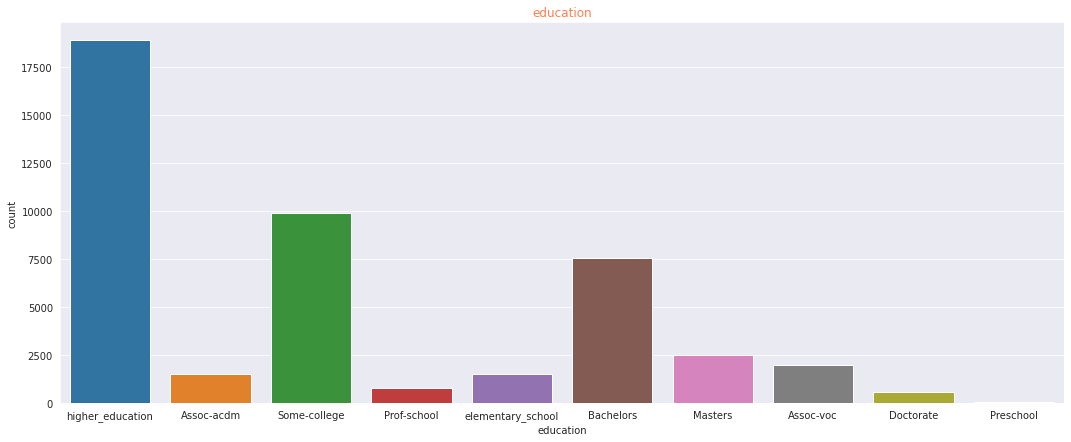

In [764]:
plt.figure(figsize = (18, 7))
sns.countplot(mod_df['education'])
plt.title('education',color='coral')

**Observation:**

*   As records of students having 9th,10th,11,12th,HS-grad degree are less so we can combine them under one category as higher_education. 
*  we combined smaller similar groups  1st-4th, 5th-6th, 7th-8th and represented as Elementary_school


## Marital-Status

### Unique Elements in Marital-Status

In [765]:
mod_df=mod_df.rename(columns = {"marital-status":"maritalstatus"})

In [766]:
print(f'The unique elements present in Marital-Status are : {mod_df.maritalstatus.unique()}')
print('\t')
print('*************************************')
print('\t')
print(f'The number of unique elements present in Marital-Status is : {mod_df.maritalstatus.nunique()}')

The unique elements present in Marital-Status are : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
	
*************************************
	
The number of unique elements present in Marital-Status is : 7


### Clubbing related elements

In [767]:
Couple= ['Married-AF-spouse','Married-civ-spouse','Married-spouse-absent']
Divorced = ['Divorced','Separated']
mod_df['maritalstatus'].replace(Couple,'Couple',True)
mod_df['maritalstatus'].replace(Divorced,'Divorced',True)

Text(0.5, 1.0, 'maritalstatus')

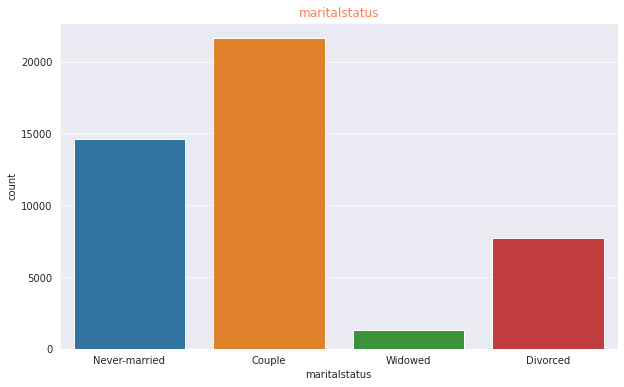

In [768]:
plt.figure(figsize = (10, 6))
sns.countplot(mod_df['maritalstatus'])
plt.title('maritalstatus',color='coral')

**Observation:**There are 7 different sections in Marital- Status but some sections are similar and some of them have very few records so we are making groups of similar sections

# Outliers

In [769]:
def i_q_r(mod_df):
    q1 = mod_df.quantile(0.25)
    q3 = mod_df.quantile(0.75)
    i_q_r = q3-q1
    low = q1 - (1.5 * i_q_r)
    up = q3 + (1.5 * i_q_r)
    print("Lower limit is: ",low)
    print("Upper limit is: ",up)
    outliers=[]
    for i in mod_df:
        if (i < low) or (i > up):
            outliers.append(i)
    k=[low,up]
    return k

# Catageries Of Data

In [770]:
mod_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
maritalstatus      object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

**Observation:**


*   **Categorical Data:** work class, education, maritalstatus, occupation, relationship, race, gender, native-country, income  
*   **Numerical Data:**  age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week


# Univariate Analysis

## Workclass

### Count Plot

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
	
****************************

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64



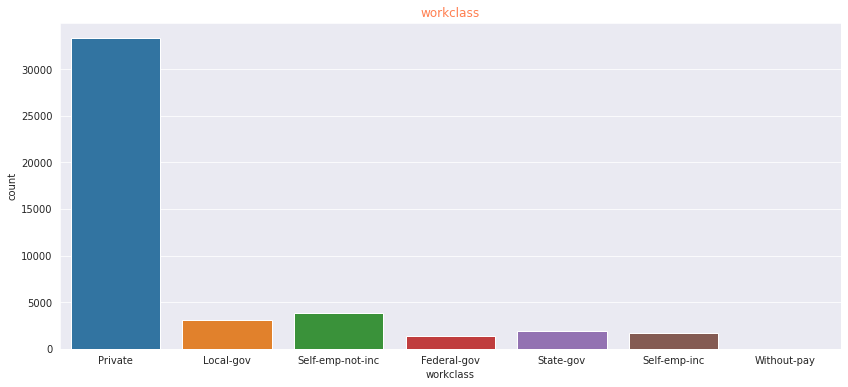

In [771]:
plt.figure(figsize = (14, 6))
sns.countplot(mod_df['workclass'])
plt.title('workclass',color='coral')
print(mod_df['workclass'].unique())
print('\t')
print('****************************')
print()
print(mod_df['workclass'].value_counts())
print()

### Pie-Chart

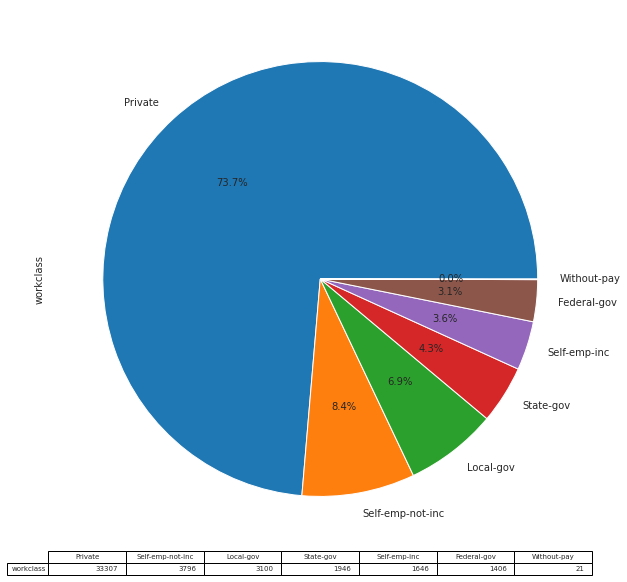

In [772]:
plt.figure(figsize=(10,10))
mod_df.workclass.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

**Observation:**The dataset is imbalance because 73.7 % of them are belongs to Private Company.

## Occupation

### Count Plot

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

****************************

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64



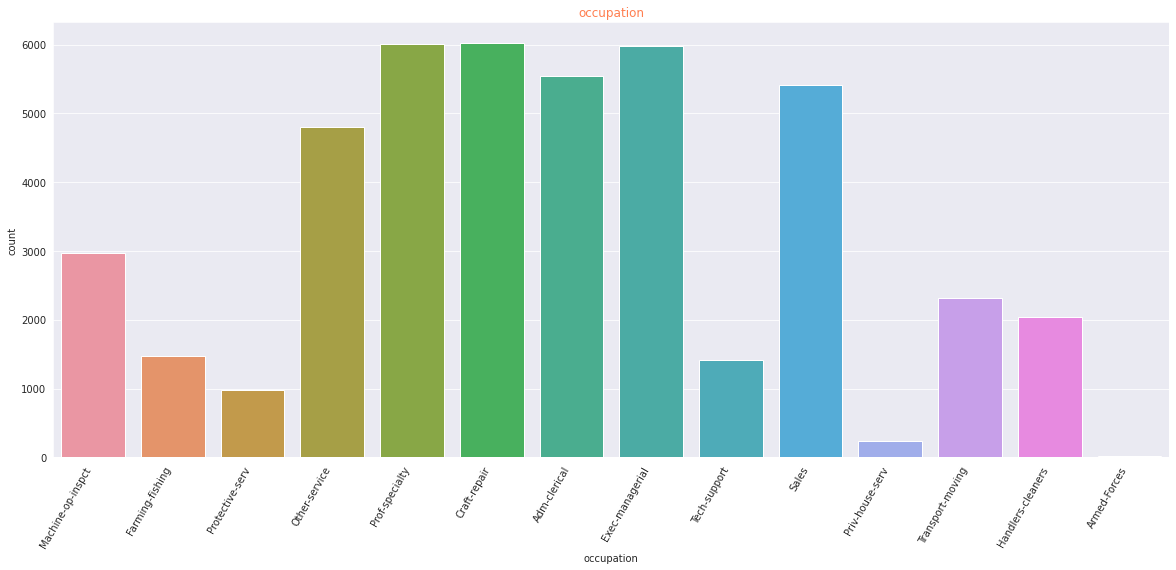

In [773]:
plt.figure(figsize = (20, 8))
plott=sns.countplot(mod_df['occupation'])
plott.set_xticklabels(plott.get_xticklabels(), rotation=60, ha="right")
plt.title('occupation',color='coral')
print(mod_df['occupation'].unique())
print()
print('****************************')
print()
print(mod_df['occupation'].value_counts())
print()

### Pie-Chart

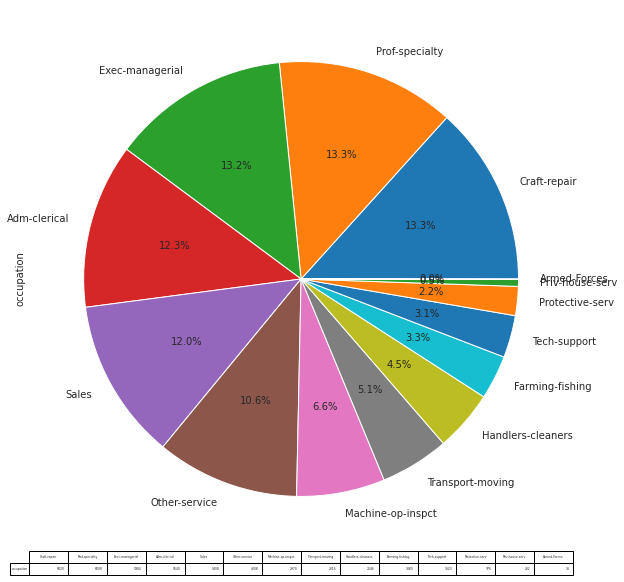

In [774]:
plt.figure(figsize=(10,10))
mod_df.occupation.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

**Observation:** 

1.  Ratio of Exec-Managerial to Prof-Speciality to Craft-Repair is almost equal to 1.
2.   number of persons working in Farming-Fishing is almost same as Tech-Support.
3.   number of persons working in Sales is almost same as Adm-Clerical.


## Relationship

### Count Plot

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

****************************

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64



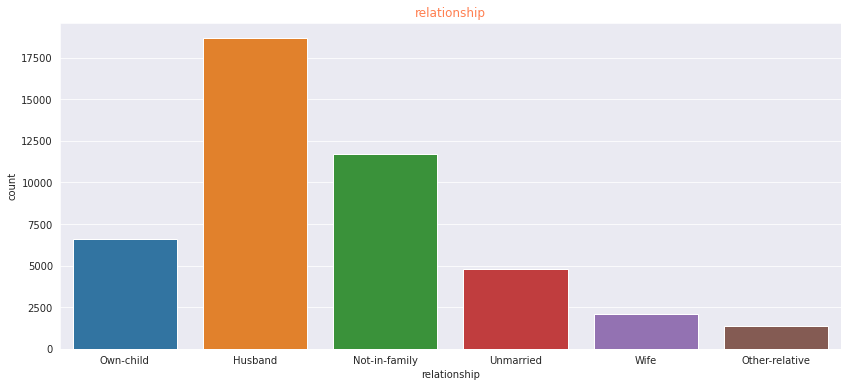

In [775]:
plt.figure(figsize = (14, 6))
sns.countplot(mod_df['relationship'])
plt.title('relationship',color='coral')
print(mod_df['relationship'].unique())
print()
print('****************************')
print()
print(mod_df['relationship'].value_counts())
print()

### Pie-Chart

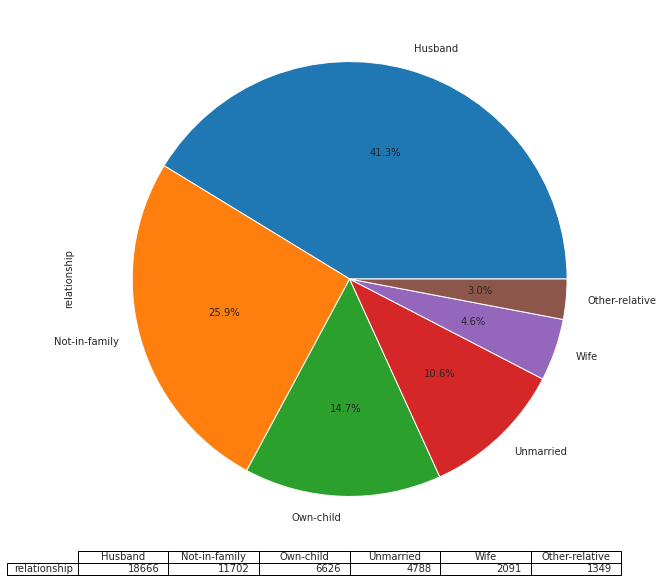

In [776]:
plt.figure(figsize=(10,10))
mod_df.relationship.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** Husbands has registered the majority with 41.3% and the people who are Not-in-family has registered with 25.9% 

## Race

### Count Plot

['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']

****************************

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64



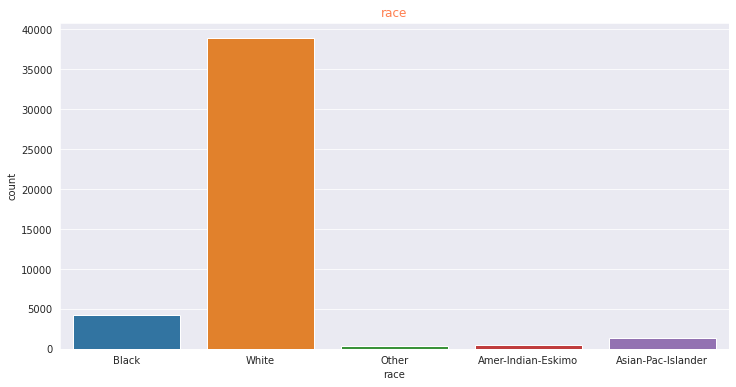

In [777]:
plt.figure(figsize = (12, 6))
sns.countplot(mod_df['race'])
plt.title('race',color='coral')
print(mod_df['race'].unique())
print()
print('****************************')
print()
print(mod_df['race'].value_counts())
print()


### Pie-Chart

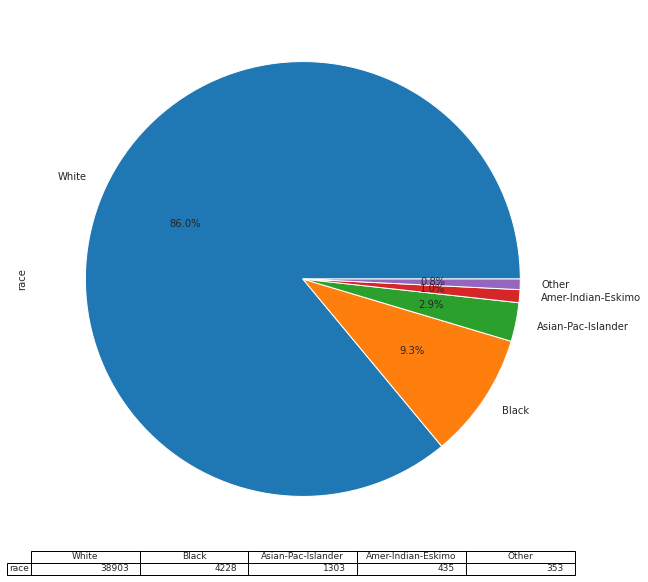

In [778]:
plt.figure(figsize=(10,10))
mod_df.race.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** Here we can see Whites are Ruling the Race. People who are  whites are registered with 86%.

## Gender

### Count Plot

['Male' 'Female']

****************************

Male      30527
Female    14695
Name: gender, dtype: int64



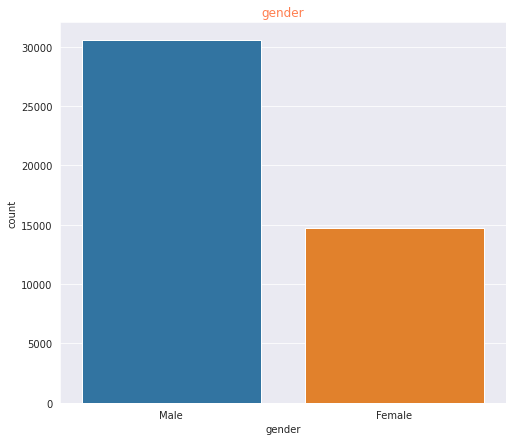

In [779]:
plt.figure(figsize = (8, 7))
sns.countplot(mod_df['gender'])
plt.title('gender',color='coral')
print(mod_df['gender'].unique())
print()
print('****************************')
print()
print(mod_df['gender'].value_counts())
print()

### Pie-Chart

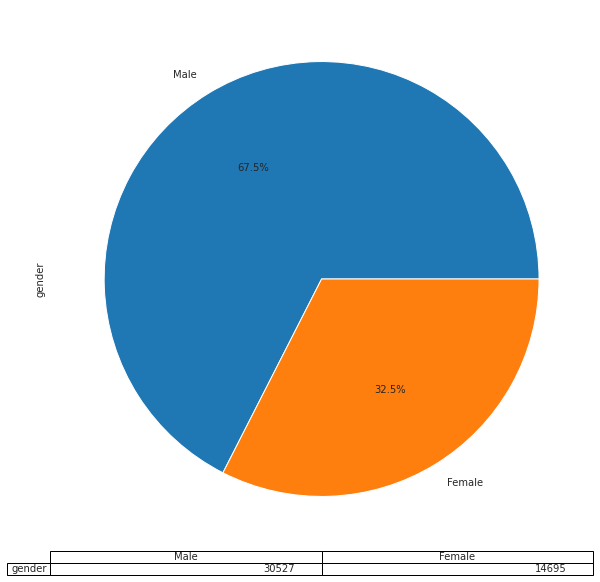

In [780]:
plt.figure(figsize=(10,10))
mod_df.gender.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:**Majority of the people are Males with 67%

## native-country

### Count Plot

In [781]:
mod_df=mod_df.rename(columns = {"native-country":"nativecountry"})

['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']

****************************

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100


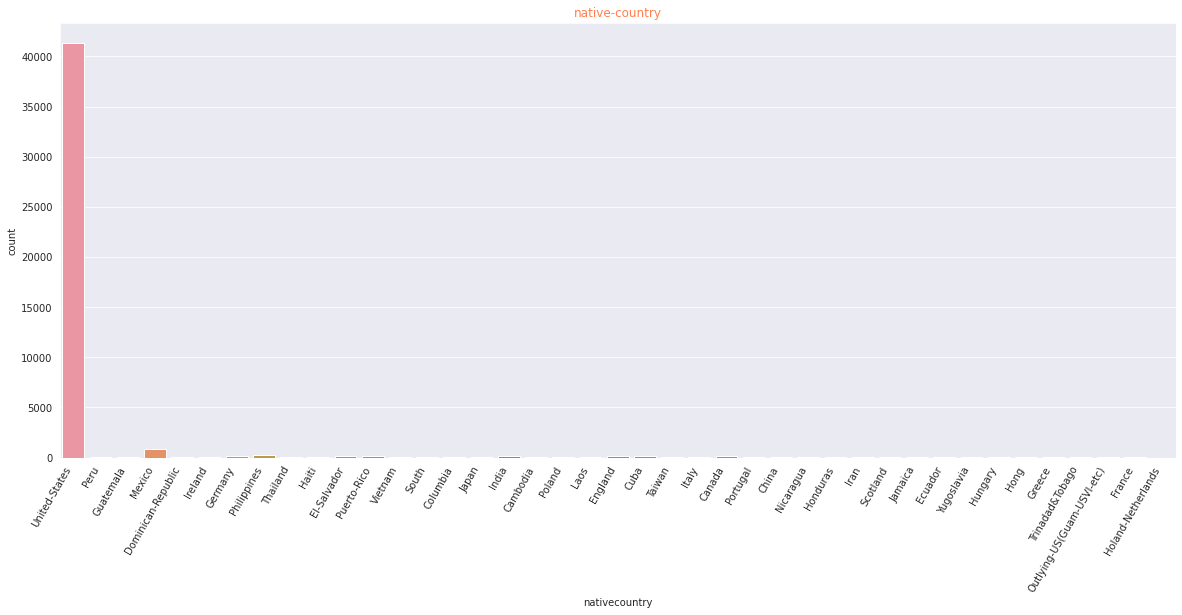

In [782]:
plt.figure(figsize = (20, 8))
sns.set_style('darkgrid')
plott=sns.countplot(mod_df['nativecountry'])
plott.set_xticklabels(plott.get_xticklabels(), rotation=60, ha="right")
plt.title('native-country',color='coral')
print(mod_df['nativecountry'].unique())
print()
print('****************************')
print()
print(mod_df['nativecountry'].value_counts())
print()

### Pie-Chart

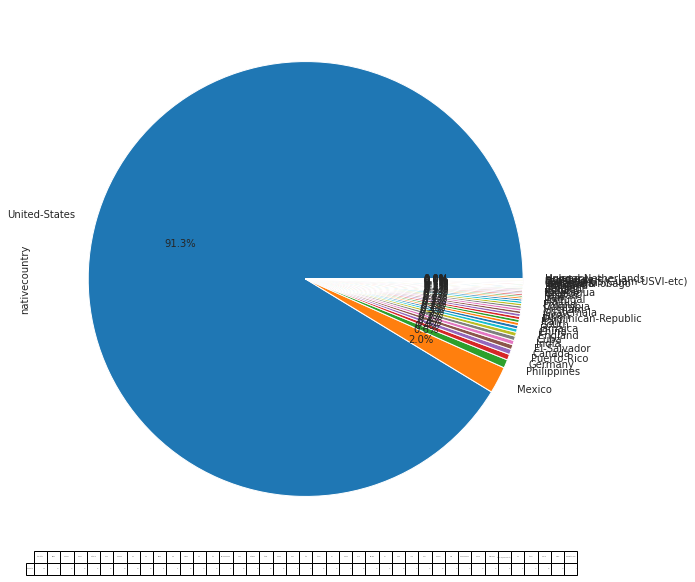

In [783]:
plt.figure(figsize=(10,10))
mod_df['nativecountry'].value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:**The Dataset is imbalance because mostly all of them belongs to United-States. 91.3% of them are United-States

## Income

### Count Plot

['<=50K' '>50K']

****************************

<=50K    34014
>50K     11208
Name: income, dtype: int64



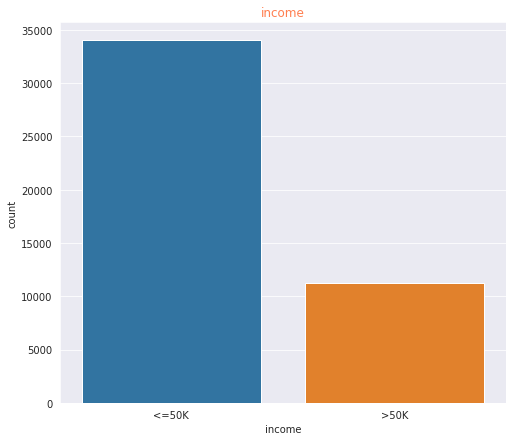

In [784]:
plt.figure(figsize = (8, 7))
sns.countplot(mod_df['income'])
plt.title('income',color='coral')
print(mod_df['income'].unique())
print()
print('****************************')
print()
print(mod_df['income'].value_counts())
print()

**Observation:** 

1. Here more than 75% of people are getting income less than 50k.
1. Here **Income** plays a vital role in processing because income is our target variable.
 so rather than removing we will convert to numerical 
2. So we will convert Categorical Data into Numerical Data Using One Hot Encoder.

### Pie-Chart

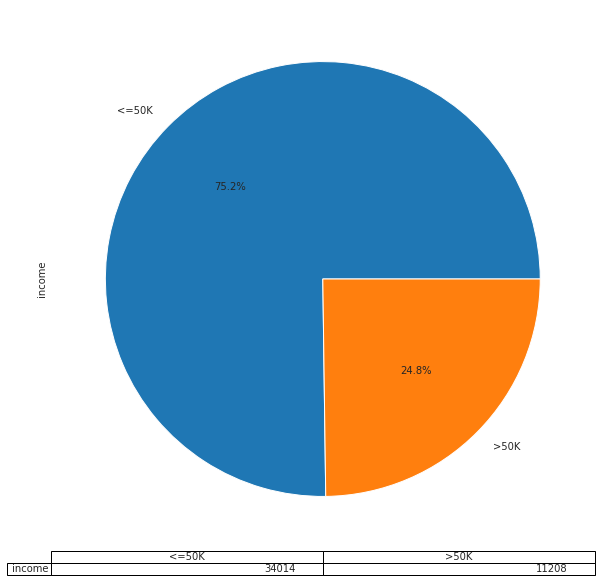

In [785]:
plt.figure(figsize=(10,10))
mod_df.income.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** 75% of the people are earning less than 50,000.

## Age

### Count Plot

[25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]

****************************

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64



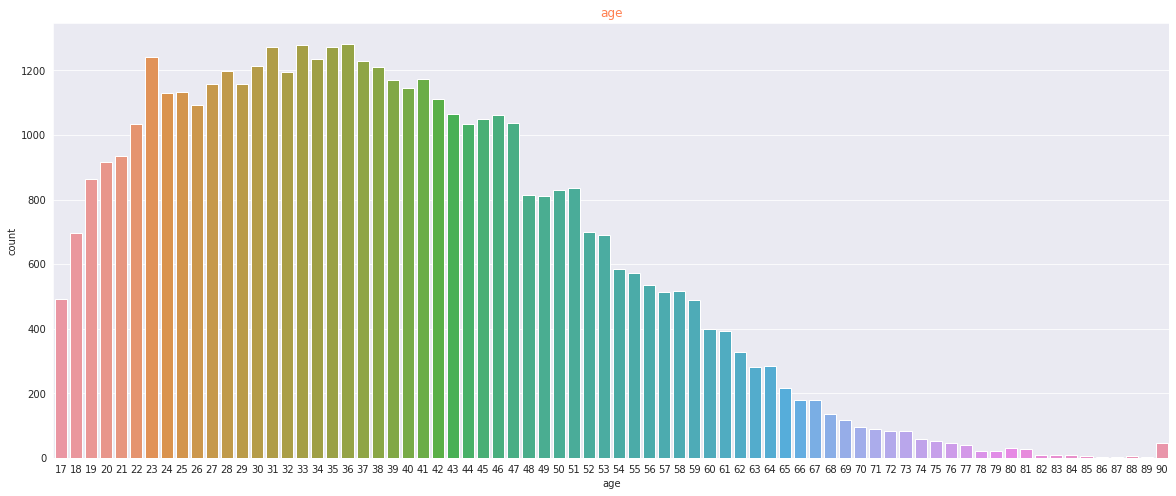

In [786]:
plt.figure(figsize=(20,8))
sns.countplot(mod_df['age'])
plt.title('age',color='coral')
print(mod_df['age'].unique())
print()
print('****************************')
print()
print(mod_df['age'].value_counts())
print()

**Observation:** The no of people from the age of 17 was increases until it reaches maximum count (i.e is upto the age of 36) Then its starts decreasing. 

### Pie-Chart

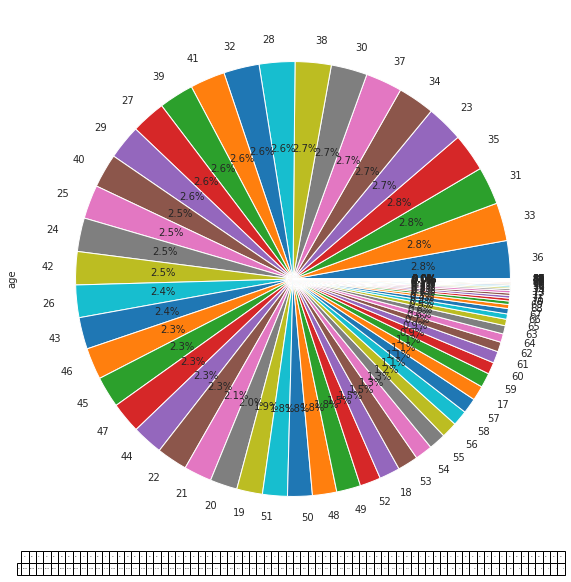

In [787]:
plt.figure(figsize=(10,10))
mod_df.age.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

### Histogram

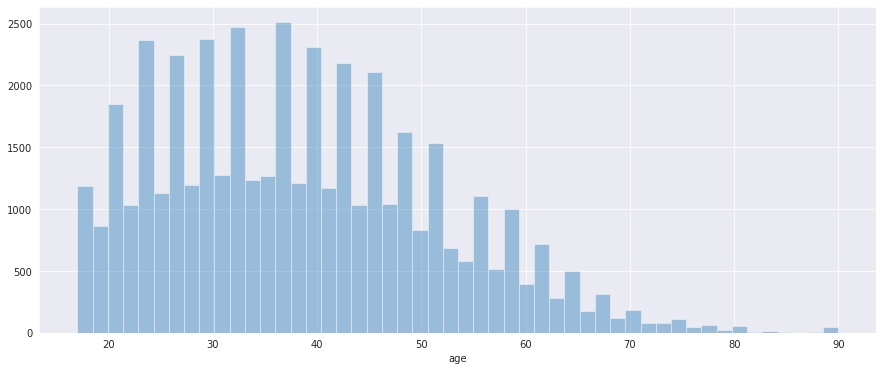

In [788]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['age'],kde=False)
plt.show()


### Normal Distribution

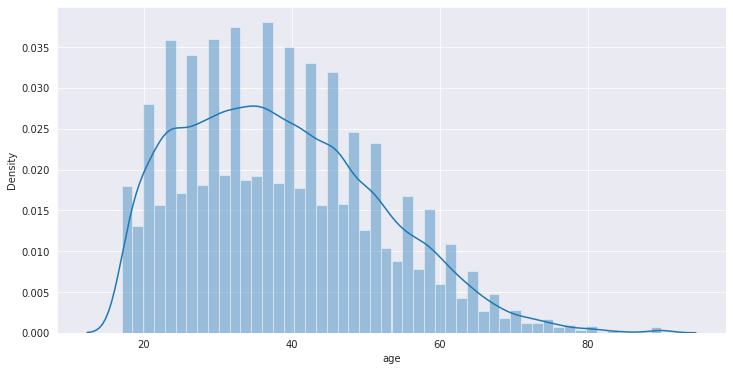


mean:  38.547941267524656
median: 37.0
mode: 0    36
dtype: int64

Skewness: 0.5327982207514131
Kurtosis: -0.15598989404957342



In [789]:
plt.figure(figsize=(12,6))
sns.distplot(mod_df['age'])
plt.show()
print()
print('mean: ',mod_df['age'].mean())
print('median:',mod_df['age'].median())
print('mode:',mod_df['age'].mode())
print()
print('Skewness:',skew(mod_df['age']))
print('Kurtosis:',kurtosis(mod_df['age']))
print()

**Observation:** 

*   The above graph is Positively Skewed normal Distribution.
*   Or we can check this by using mean,mode and median. Here $mean>median>mode$ . so it is Positively Skewed normal Distribution.


### Box-Cox Transformation

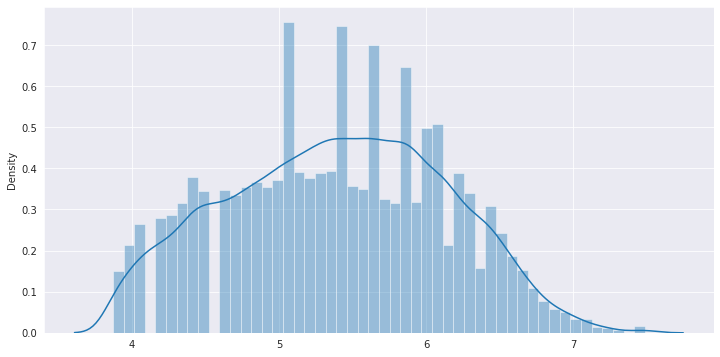



mean:  5.387813179560827
median: 5.400724708005958
mode: 5.342449379139723

Skewness: -0.017876443767218957
Kurtosis: -0.7164512902788283



In [790]:
plt.figure(figsize=(12,6))
transformed, _ = stats.boxcox(mod_df['age']) 
#plot the distribution of the transformed data values
sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))
print('mode:',st.mode(transformed))
print()
print('Skewness:',skew(transformed))
print('Kurtosis:',kurtosis(transformed))
print()

**Observation:** 
*   After applying Box-Cox Transformation Graph becomes **Zero-skewed**
*   we can check this by using mean,mode and median. here mean, mode and median are almost same.



### Box Plot

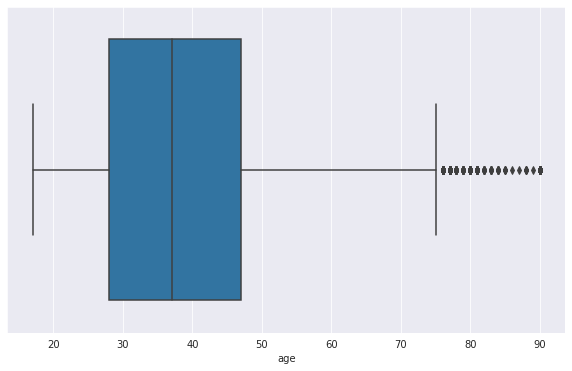

In [791]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['age'])

**Observation:** There are lot of outliers. This outliers are one responsible for not getting normal distribution.

## fnlwgt

### Count Plot

[226802  89814 336951 ... 199655 255835 257302]

****************************

203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64



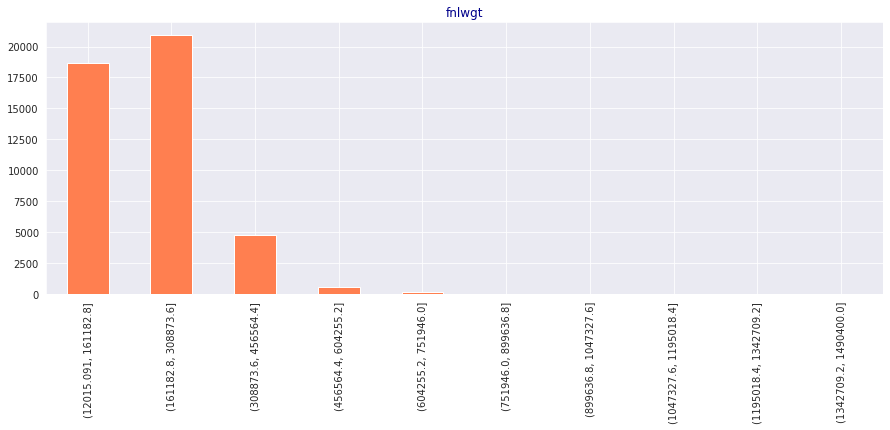

In [792]:
plt.figure(figsize=(15,5))
mod_df['fnlwgt'].value_counts(bins=10,sort=False).plot(kind='bar',color='coral')
plt.title('fnlwgt',color='darkblue')
print(mod_df['fnlwgt'].unique())
print()
print('****************************')
print()
print(mod_df['fnlwgt'].value_counts())
print()

**Observation:** Majority of them lies in the range of 12015 to 308873

### Pie-Chart

In [793]:
"""plt.figure(figsize=(10,10))
mod_df.fnlwgt.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()"""

"plt.figure(figsize=(10,10))\nmod_df.fnlwgt.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')\nplt.show()"

### Histogram

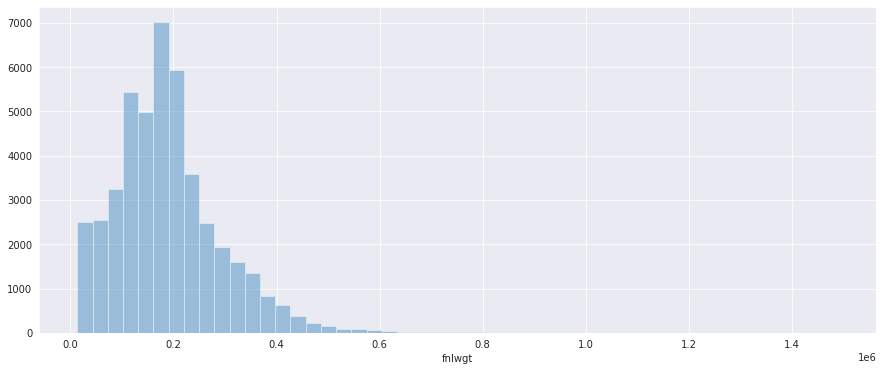

In [794]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['fnlwgt'],kde=False)
plt.show()

**Observation:** initially it starts increasing and reachesd its maximum value at 0.04$e^6$ then its start decreasing.

### Normal Distribution

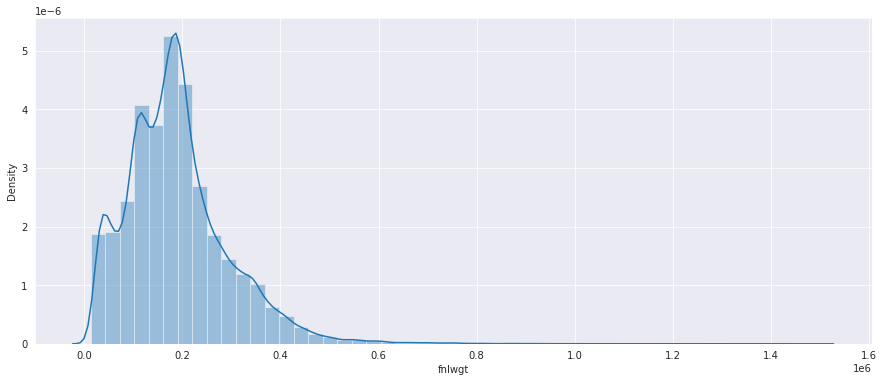


mean:  189734.7343107337
median: 178316.0
mode: 0    203488
dtype: int64

Skewness: 1.4474675385160618
Kurtosis: 6.183515143987954



In [795]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['fnlwgt'])
plt.show()
print()
print('mean: ',mod_df['fnlwgt'].mean())
print('median:',mod_df['fnlwgt'].median())
print('mode:',mod_df['fnlwgt'].mode())
print()
print('Skewness:',skew(mod_df['fnlwgt']))
print('Kurtosis:',kurtosis(mod_df['fnlwgt']))
print()

**Observation:** The above Normal Distribution is having very long Tail and it is **Positively** **Skeewed** **Normal** **Distribution**

### Box-Cox Transformation

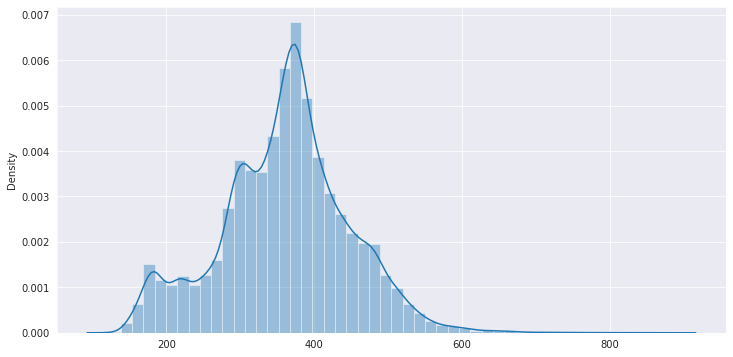



mean:  360.22861285331743
median: 364.89887679111484
mode: 385.6357217938613

Skewness: 0.015975620247399226
Kurtosis: 0.4502327909926076



In [796]:
plt.figure(figsize=(12,6))
transformed, _ = stats.boxcox(mod_df['fnlwgt']) 
#plot the distribution of the transformed data values
sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))
print('mode:',st.mode(transformed))
print()
print('Skewness:',skew(transformed))
print('Kurtosis:',kurtosis(transformed))
print()

**Observation:** 
*   After applying Box-Cox Transformation Graph becomes **Zero-skewed** and kurtosis also reduced.
*   we can check this by using mean,mode and median. here mean, mode and median are nearly same.

### Box Plot

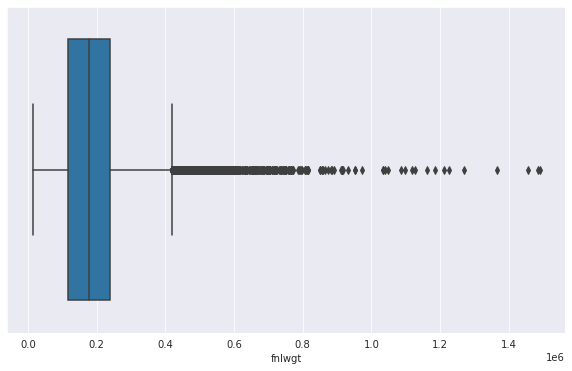

In [797]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['fnlwgt'])

**Observation:** Here median is at 0.17$e^6$. and there are lot of Outliers

## educational-num

### Count Plot

[ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]

****************************

9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: educational-num, dtype: int64



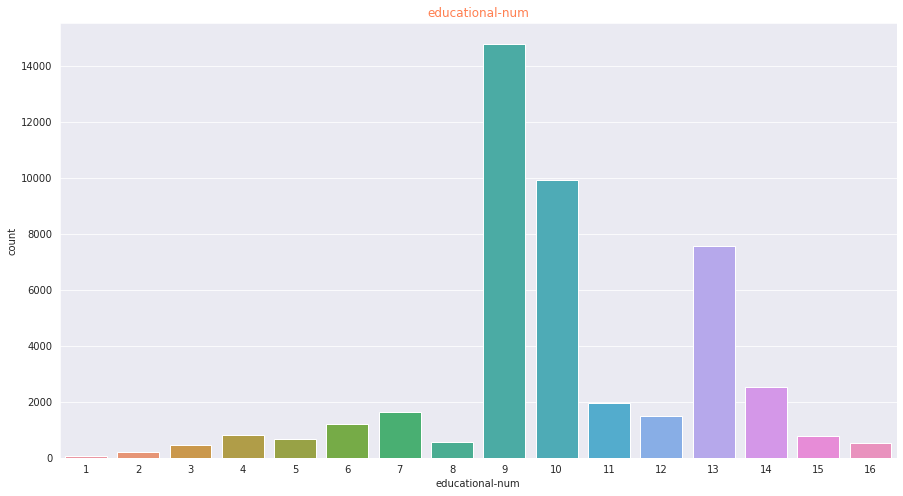

In [798]:
plt.figure(figsize=(15,8))
sns.countplot(mod_df['educational-num'])
plt.title('educational-num',color='coral')
print(mod_df['educational-num'].unique())
print()
print('****************************')
print()
print(mod_df['educational-num'].value_counts())
print()

**Observation:** Here the **maximum** value is obtained at **9** and at **1** it has **minimum** value

### Histogram

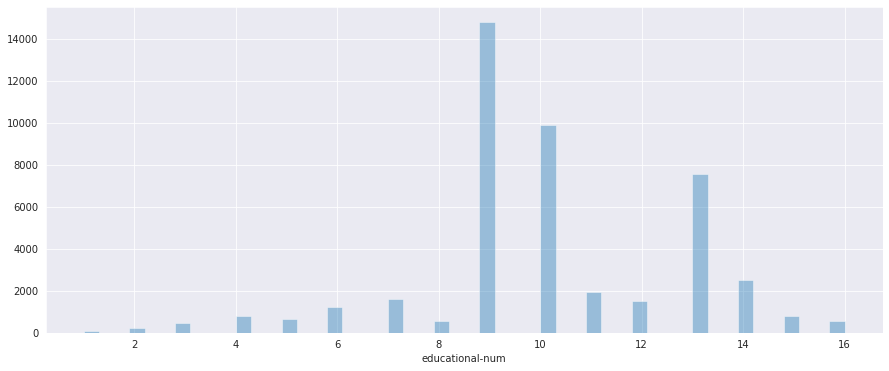

In [799]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['educational-num'],kde=False)
plt.show()

**Observation:** Here count is more than 14,000 is occured at **9**.

### Pie-Chart

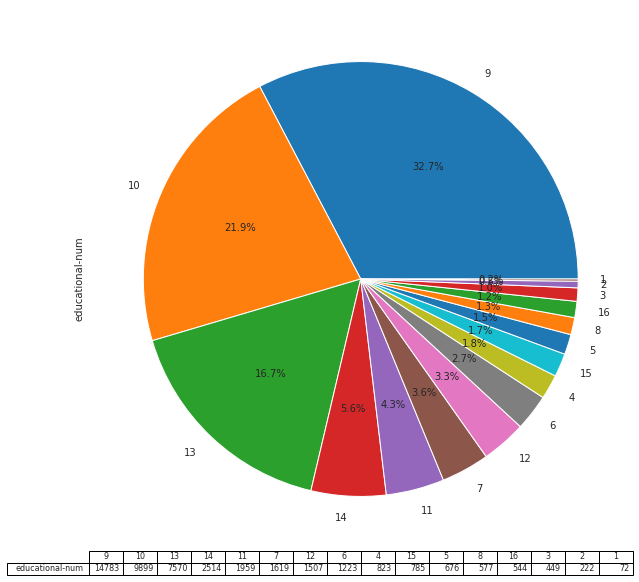

In [800]:
plt.figure(figsize=(10,10))
mod_df['educational-num'].value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** Here is 9 having high frequency with 32% and next with 10 with 21.9%.

### Normal Distribution

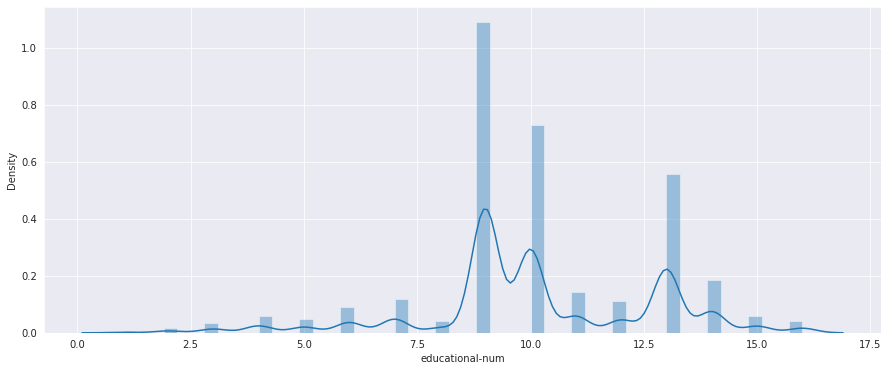


mean:  10.118460041572686
median: 10.0
mode: 0    9
dtype: int64

Skewness: -0.31061064317966836
Kurtosis: 0.6349206856702803



In [801]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['educational-num'])
plt.show()
print()
print('mean: ',mod_df['educational-num'].mean())
print('median:',mod_df['educational-num'].median())
print('mode:',mod_df['educational-num'].mode())
print()
print('Skewness:',skew(mod_df['educational-num']))
print('Kurtosis:',kurtosis(mod_df['educational-num']))
print()

**Observation:** The above Graph is having **long tail**. and it has **same** **mean** and **median**.

### Box-Cox Transformation

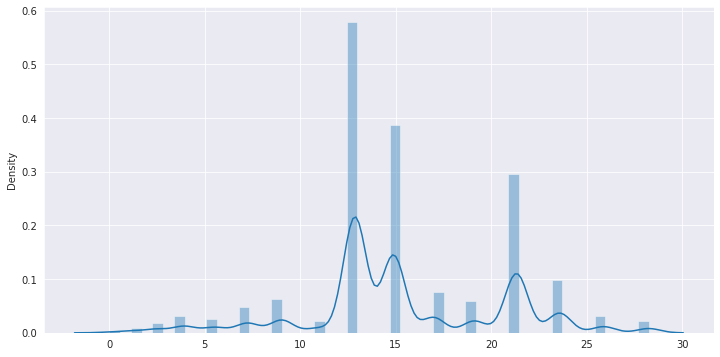



mean:  15.351143369743733
median: 14.889354599386033
mode: 12.867697331607122

Skewness: 0.020744068626921946
Kurtosis: 0.1424771273951002



In [802]:
plt.figure(figsize=(12,6))
transformed, _ = stats.boxcox(mod_df['educational-num']) 
#plot the distribution of the transformed data values
sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))
print('mode:',st.mode(transformed))
print()
print('Skewness:',skew(transformed))
print('Kurtosis:',kurtosis(transformed))
print()

**Observation:**After applying Box-Cox transformation Skewness is almost equals to **0**.

### Box Plot

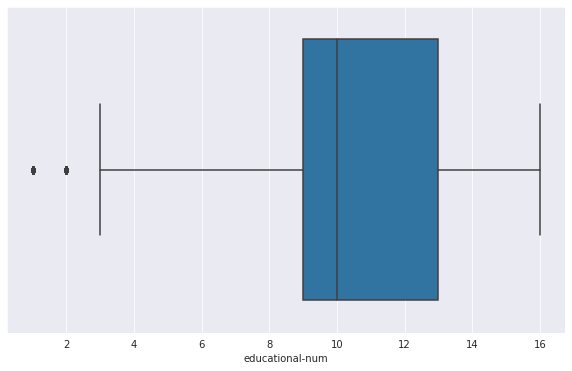

In [803]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['educational-num'])

**Observation:** Here we can see there are only **Two** Outliers.

### Removing Outliers

## Capital-gain

### Count Plot

[    0  7688  3103  6418  7298  3908 14084  5178 15024  2597  2907  4650
  6497  5013 27828  4934  4064  3674  2174 10605 99999  1055   114  2580
  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471 10566
  2354  1424  1455  3325  4416 25236  4787  2829  4865  1264  1506   594
 10520  3464 20051  4101  1797  2407  3471  2653  1086  1848 14344  1151
  2993  2290 15020  9386  2202  3818  2176  5455  3418 11678  7978  7262
  6514 41310  3456  7430  2062 34095  1831  6723  5060 15831  2977  2346
  3273  2329  9562  2105  2635  2414  4931  1731  6097   914  7896  5556
  3781  3942  2538  3887  1409 25124  7443  5721   401  1173  4687  6767
   991  2036  2050  2961  2228 22040  2936  6360  2009  3432  1639 18481
  2387]

****************************

0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
1731         1
22040        1
7262         1
1639         1
2387         1
Name: capital-gain, Length: 121, dtype: int64



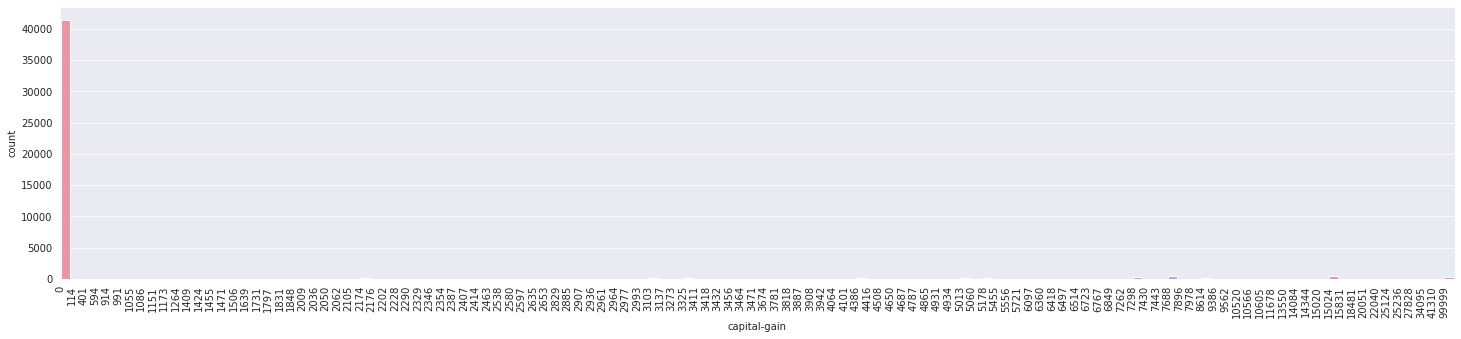

In [804]:
plt.figure(figsize=(25,5))
plott=sns.countplot(mod_df['capital-gain'])
plott.set_xticklabels(plott.get_xticklabels(),rotation=90,ha='right')
print(mod_df['capital-gain'].unique())
print()
print('****************************')
print()
print(mod_df['capital-gain'].value_counts())
print()
plt.show()

**Observation:** Here we can see, we hav eonly values at **0** and very less values are present at remaining positions.

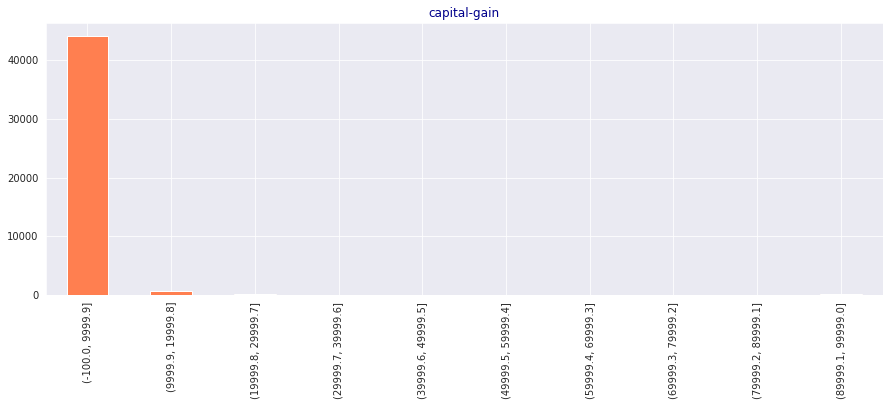

In [805]:
plt.figure(figsize=(15,5))
mod_df['capital-gain'].value_counts(bins=10,sort=False).plot(kind='bar',color='coral')
plt.title('capital-gain',color='darkblue')
plt.show()

### Histogram

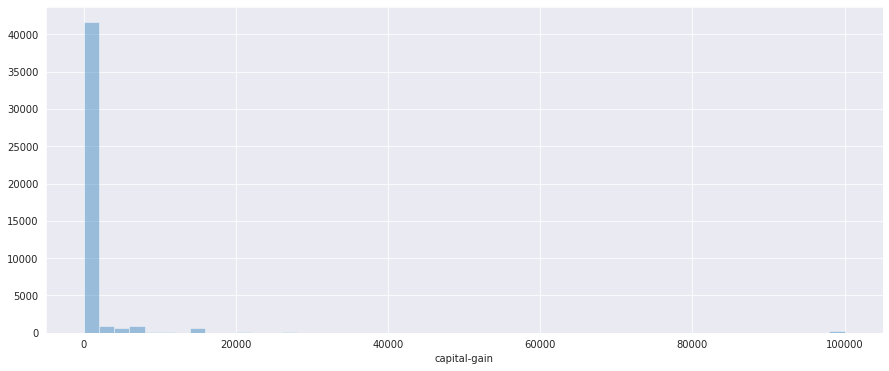

In [806]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['capital-gain'],kde=False)
plt.show()

**Observation:** There are lot of values at **Zero**. and remaining all of them are **Outliers**.


### Pie-Chart

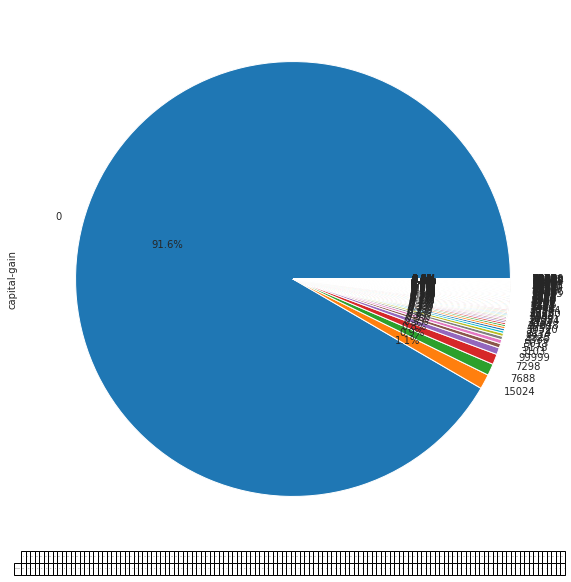

In [807]:
plt.figure(figsize=(10,10))
mod_df['capital-gain'].value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** The data is **imbalance**. Because 91% of them are **0**.

### Normal Distribution

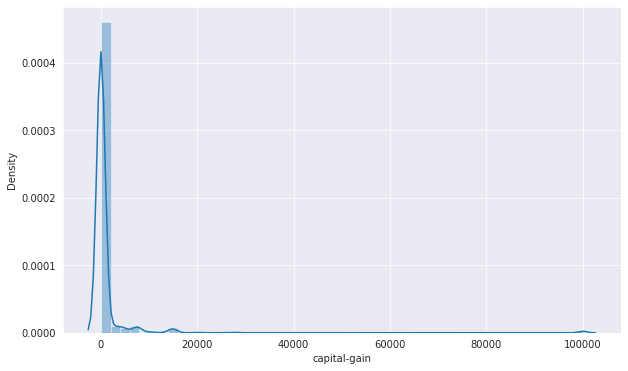


mean:  1101.4303436380524
median: 0.0
mode: 0    0
dtype: int64

Skewness: 11.788611139067775
Kurtosis: 150.1345585413784



In [808]:
plt.figure(figsize=(10,6))
sns.distplot(mod_df['capital-gain'])
plt.show()
print()
print('mean: ',mod_df['capital-gain'].mean())
print('median:',mod_df['capital-gain'].median())
print('mode:',mod_df['capital-gain'].mode())
print()
print('Skewness:',skew(mod_df['capital-gain']))
print('Kurtosis:',kurtosis(mod_df['capital-gain']))
print()

**Observation:**
1.   graph is havi very **long tail** and it is **Positively skeewed** normal Distribution
1.   here median is Zero. 
2.   If we **remove** all the **Outliers** then it has values only  at **Zero**.

### Box Plot

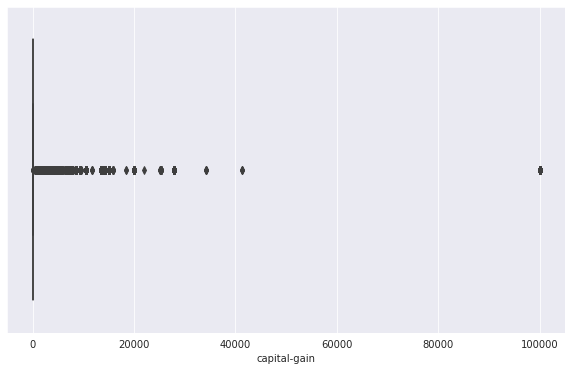

In [809]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['capital-gain'])

**Observation:** 

*   It has values only Zero remaining all the values are outliers.
*   There is **no use** of having this column and it wont improve our model.So this **Column** has to be **deleted**. 



### Removing Capital-Gain Column

In [810]:
mod_df.drop(['capital-gain'],axis=1,inplace = True)

In [811]:
mod_df.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,capital-loss,hours-per-week,nativecountry,income
0,25,Private,226802,higher_education,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,40,United-States,<=50K
1,38,Private,89814,higher_education,9,Couple,Farming-fishing,Husband,White,Male,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Couple,Protective-serv,Husband,White,Male,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Couple,Machine-op-inspct,Husband,Black,Male,0,40,United-States,>50K
5,34,Private,198693,higher_education,6,Never-married,Other-service,Not-in-family,White,Male,0,30,United-States,<=50K


In [812]:
mod_df.shape

(45222, 14)

## Capital-loss

### Count Plot

[   0 1721 1876 2415 1887  625 1977 2057 1429 1590 1485 2051 2377 1672
 1628 1902 1741 2444 1408 2001 2042 1740 1825 1848 1719 3004 2179 1573
 2205 1258 2339 1726 2258 1340 1504 2559 1668 1974 1980 1564 2547 2002
 1669 1617  323 1602 3175 2472 1579 2129 1735 2282 1870 1911 1092 1762
 2457 2231 2238  653 1138 2246 2603 2392 1510 1944 1380 1421 3770 1594
  213 2824 2174 1844 2149 1411 2467 2163 1651 1816 2206 2352 1539  880
  810  974 1648 1755 3683 4356 2267 2080  419  155 3900 2201 2754]

****************************

0       43082
1902      294
1977      246
1887      228
2415       68
        ...  
2201        1
1421        1
4356        1
2163        1
1870        1
Name: capital-loss, Length: 97, dtype: int64



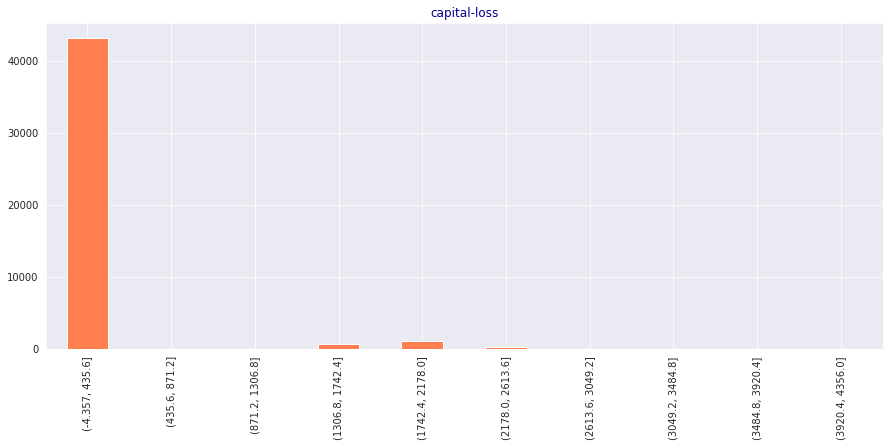

In [813]:
plt.figure(figsize=(15,6))
mod_df['capital-loss'].value_counts(bins=10,sort=False).plot(kind='bar',color='coral')
plt.title('capital-loss',color='darkblue')
print(mod_df['capital-loss'].unique())
print()
print('****************************')
print()
print(mod_df['capital-loss'].value_counts())
print()
plt.show()

**Observation:**Here moajority of them lies between -4.317 and 435.6

### Histogram

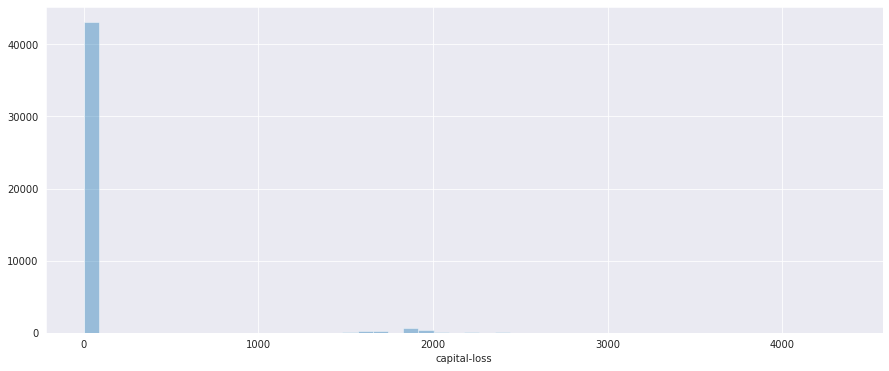

In [814]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['capital-loss'],kde=False)
plt.show()

**Observation:** Almost all the values are located at **0**.

### Pie-Chart

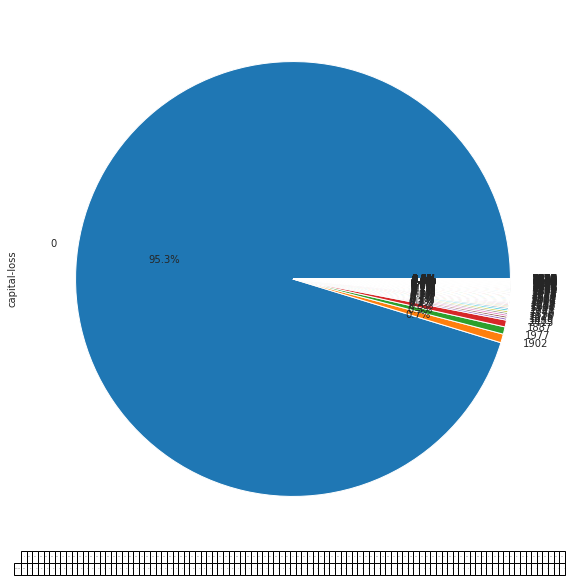

In [815]:
plt.figure(figsize=(10,10))
mod_df['capital-loss'].value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** The data is **imbalance**. Because 95% of them are **0**. So we can treat other points as **Outliers**



### Normal Distribution

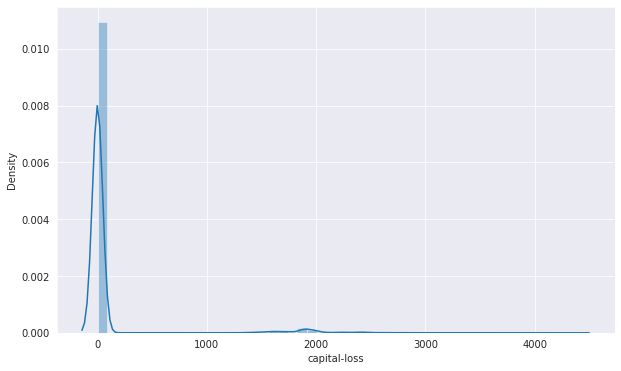


mean:  88.595418159303
median: 0.0
mode: 0    0
dtype: int64

Skewness: 4.5161543471647505
Kurtosis: 19.36169589870217



In [816]:
plt.figure(figsize=(10,6))
sns.distplot(mod_df['capital-loss'])
plt.show()
print()
print('mean: ',mod_df['capital-loss'].mean())
print('median:',mod_df['capital-loss'].median())
print('mode:',mod_df['capital-loss'].mode())
print()
print('Skewness:',skew(mod_df['capital-loss']))
print('Kurtosis:',kurtosis(mod_df['capital-loss']))
print()

**Observation:**
1.   graph is havi very **long tail** and it is **Positively skeewed** normal Distribution
1.   here median is Zero. 
2.   If we **remove** all the **Outliers** then it has values only  at **Zero**.

### Box Plot

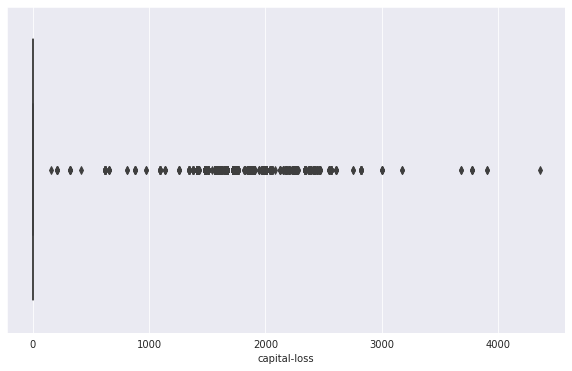

In [817]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['capital-loss'])

**Observation:** 

*   It has values only Zero remaining all the values are outliers.
*   There is **no use** of having this column and it wont improve our model.So this **Column** has to be **deleted**. 

### Removing Capital-Loss Column

In [818]:
mod_df.drop(['capital-loss'],axis=1,inplace = True)

In [819]:
mod_df.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,hours-per-week,nativecountry,income
0,25,Private,226802,higher_education,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,higher_education,9,Couple,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Couple,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Couple,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,higher_education,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [820]:
mod_df.shape

(45222, 13)

## hours-per-week

### Count Plot

[40 50 30 32 10 39 48 25 20 47 35 43 90 54 60 38 45 36 18 24 44 56 28 16
 41 22 55 14 33 37 12 70 15 75 52 84 42 80  8 68 99 65 17 72 53 96 21 46
  3  1 49 67 76 23  2 58 26 34  4  7 51 78 63  5 31 92 77 27 29 85  6 13
 19 98 62 66 57 86 11 59  9 64 73 61 88 79 89 74 69 87 97 94 82 91 81 95]

****************************

40    21358
50     4094
45     2602
60     2085
35     1776
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64



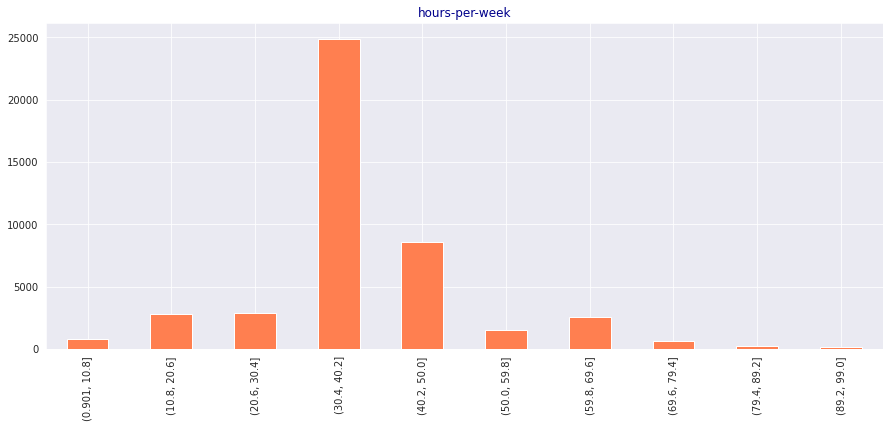

In [821]:
plt.figure(figsize=(15,6))
mod_df['hours-per-week'].value_counts(bins=10,sort=False).plot(kind='bar',color='coral')
plt.title('hours-per-week',color='darkblue')
print(mod_df['hours-per-week'].unique())
print()
print('****************************')
print()
print(mod_df['hours-per-week'].value_counts())
print()
plt.show()

**Observation:**Here moajority of them lies between 30.4 and 40.2

### Histogram

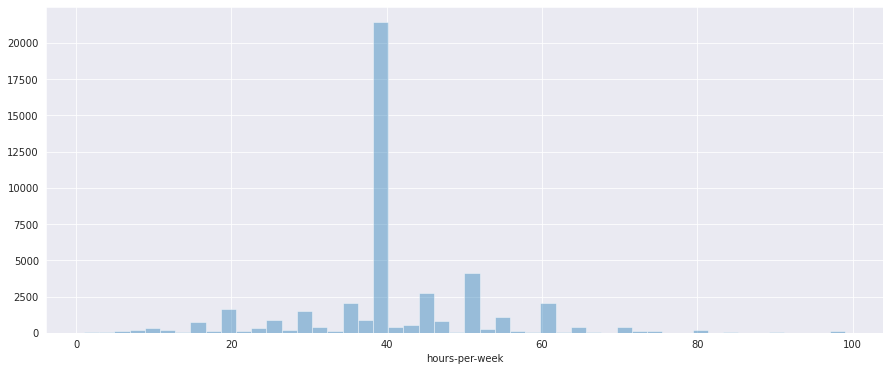

In [822]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['hours-per-week'],kde=False)
plt.show()

**Observation:** Majority of the values are located at **40**.

### Pie-Chart

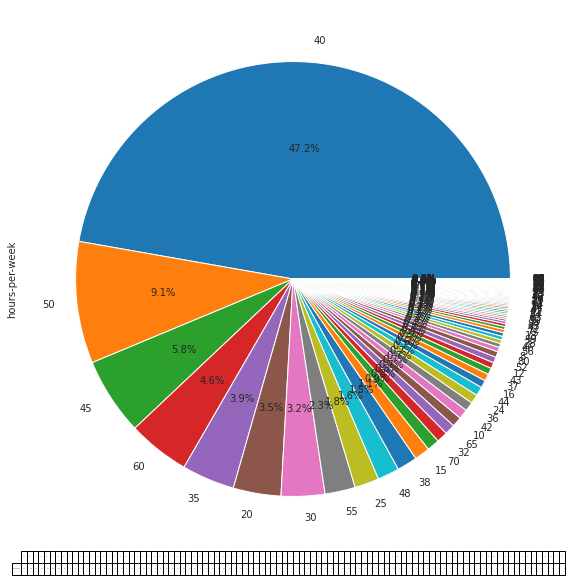

In [823]:
plt.figure(figsize=(10,10))
mod_df['hours-per-week'].value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

**Observation:** **40** has registered the majority with 47.2% .

### Normal Distribution

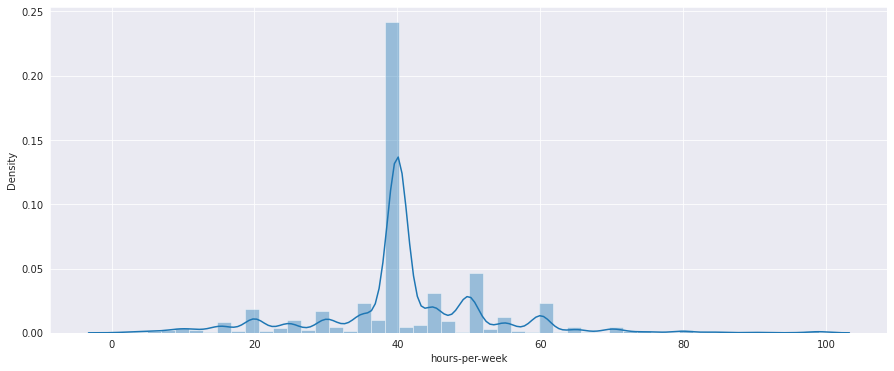


mean:  40.93801689443191
median: 40.0
mode: 0    40
dtype: int64

Skewness: 0.3405338479021799
Kurtosis: 3.2009382634725263



In [824]:
plt.figure(figsize=(15,6))
sns.distplot(mod_df['hours-per-week'])
plt.show()
print()
print('mean: ',mod_df['hours-per-week'].mean())
print('median:',mod_df['hours-per-week'].median())
print('mode:',mod_df['hours-per-week'].mode())
print()
print('Skewness:',skew(mod_df['hours-per-week']))
print('Kurtosis:',kurtosis(mod_df['hours-per-week']))
print()

**Observation:**
1.   Here mean,mode and median are almost same.(i.e all are having 40) and littled bit of skewness

### Box-Cox Transformation

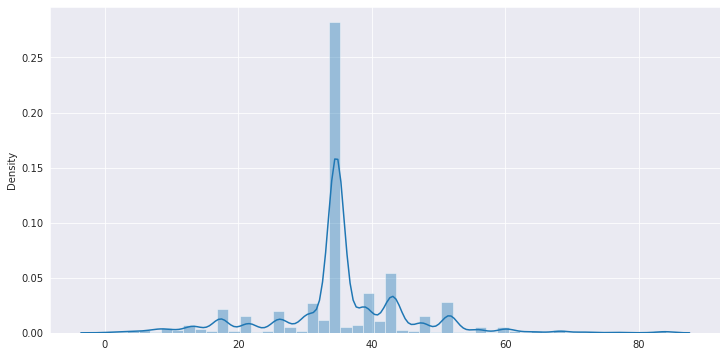



mean:  35.39288493983498
median: 34.660069670527655
mode: 34.660069670527655

Skewness: 0.2436289168912875
Kurtosis: 3.079067580673015



In [825]:
plt.figure(figsize=(12,6))
transformed, _ = stats.boxcox(mod_df['hours-per-week']) 
#plot the distribution of the transformed data values
sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))
print('mode:',st.mode(transformed))
print()
print('Skewness:',skew(transformed))
print('Kurtosis:',kurtosis(transformed))
print()

**Oobservation:** here mean,mode and median are almost same and skewness is reduced by 0.1

### Box Plot

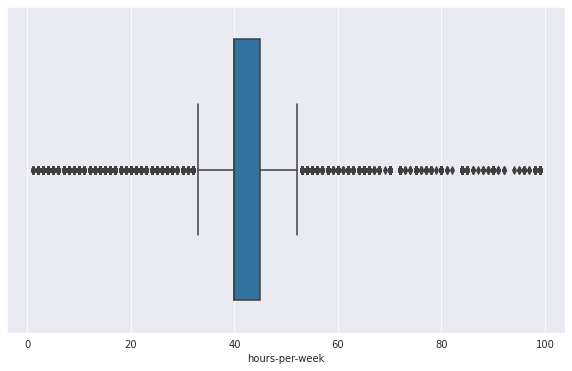

In [826]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['hours-per-week'])

**Observation:** As we can see there are lot of outliers.

**Observation:** Here median is at 0.17$e^6$. and there are lot of Outliers

### Removing Outliers

#  Bivariate Analysis

## Box-Plots Comparision

### Age

#### Age  Vs  Income

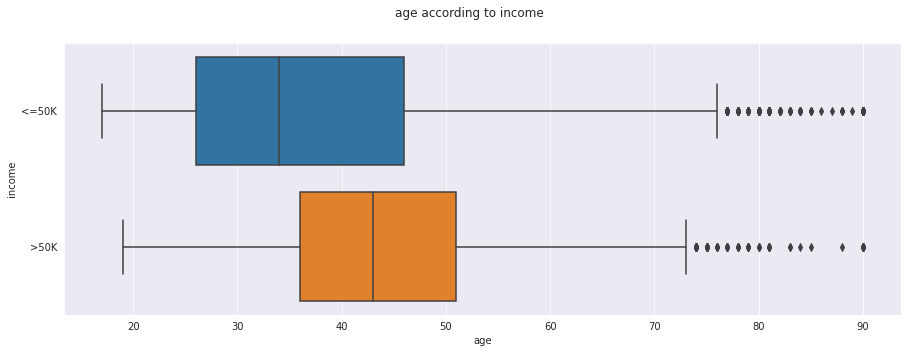

In [827]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='income',data=mod_df)
plt.suptitle('age according to income')
plt.show()

**Observation:** Here median is more for people getting  income >50k

#### Age Vs Relationship

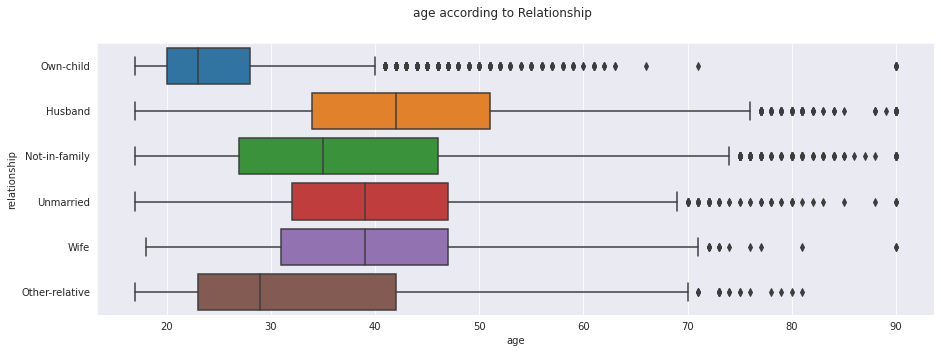

In [828]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='relationship',data=mod_df)
plt.suptitle('age according to Relationship')
plt.show()

**Observation:**Here **husband** are having **highest relationship** 

#### Age Vs Work Class

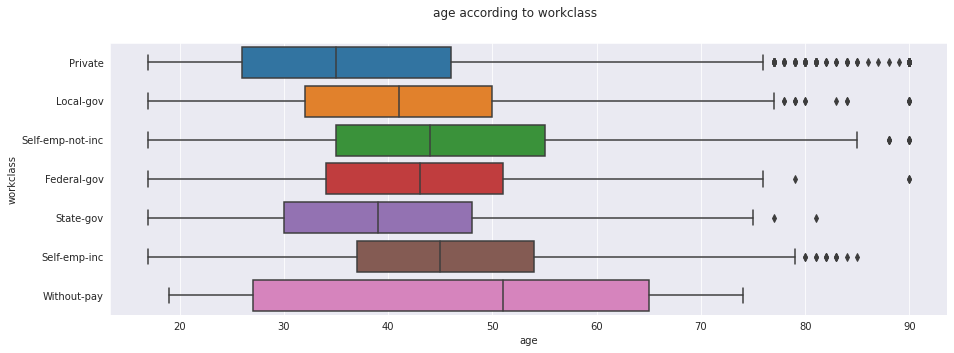

In [829]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='workclass',data=mod_df)
plt.suptitle('age according to workclass')
plt.show()

**Observation:** Here **without pay** people are working hard 

#### Age Vs  Occupation

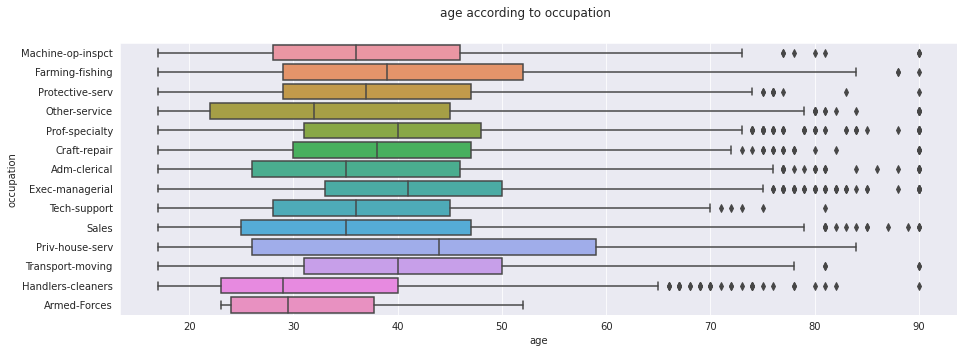

In [830]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='occupation',data=mod_df)
plt.suptitle('age according to occupation')
plt.show()

#### Age Vs Race

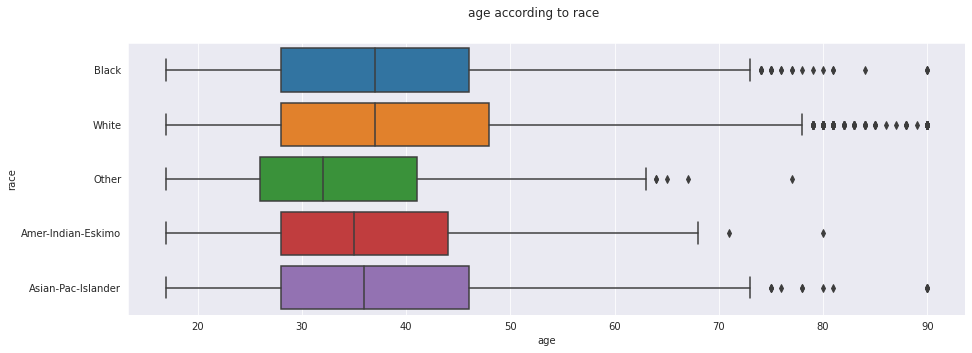

In [831]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='race',data=mod_df)
plt.suptitle('age according to race')
plt.show()

#### Age Vs Gender

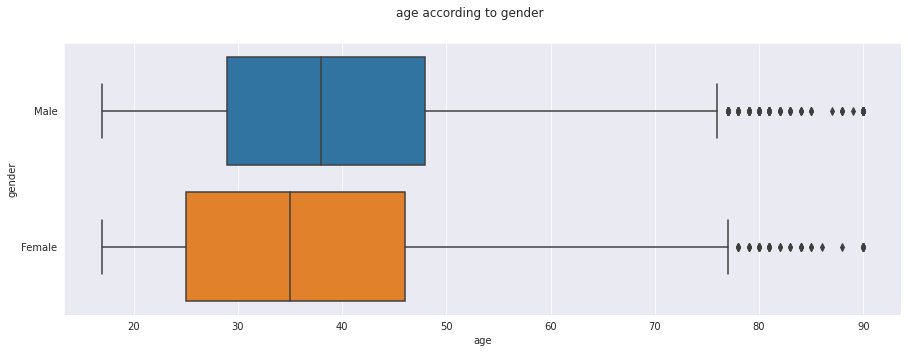

In [832]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='gender',data=mod_df)
plt.suptitle('age according to gender')
plt.show()

#### Age Vs Marital-Status

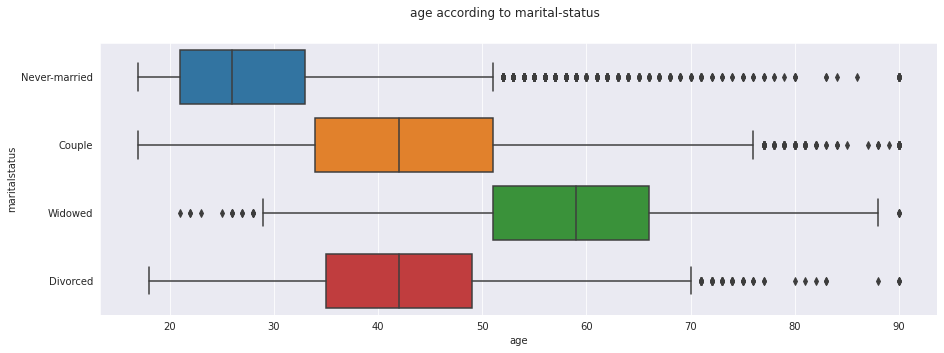

In [833]:
plt.figure(figsize=(15,5))
sns.boxplot(x='age',y='maritalstatus',data=mod_df)
plt.suptitle('age according to marital-status')
plt.show()

### Hours-per-week 

#### Hours-per-week Vs Gender

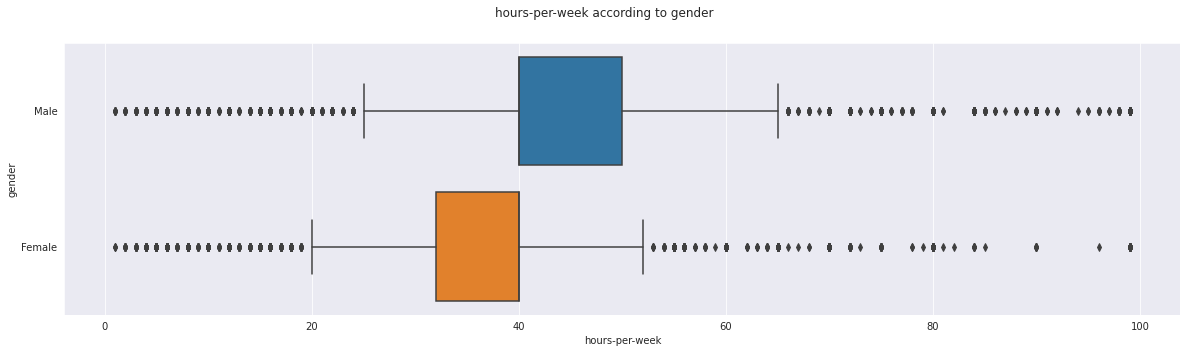

In [834]:
plt.figure(figsize=(20,5))
sns.boxplot(y='gender',x='hours-per-week',data=mod_df)
plt.suptitle('hours-per-week according to gender')
plt.show()

#### Hours-per-week Vs Income

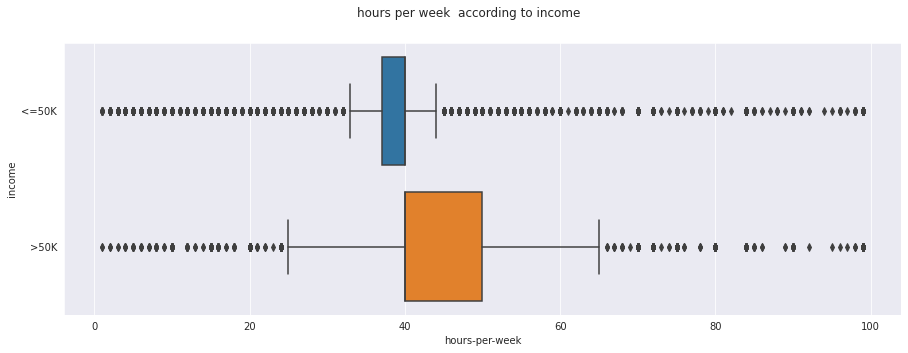

In [835]:
plt.figure(figsize=(15,5))
sns.boxplot(y='income',x='hours-per-week',data=mod_df)
plt.suptitle('hours per week  according to income')
plt.show()

#### Hours-Per-Week Vs Race

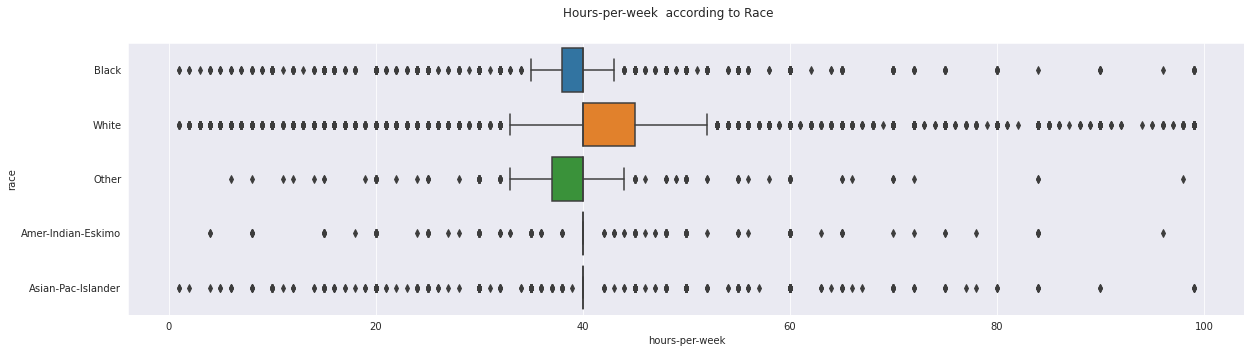

In [836]:
plt.figure(figsize=(20,5))
sns.boxplot(x='hours-per-week',y='race',data=mod_df)
plt.suptitle('Hours-per-week  according to Race')
plt.show()

#### Hours-per-week  Vs Marital-Status

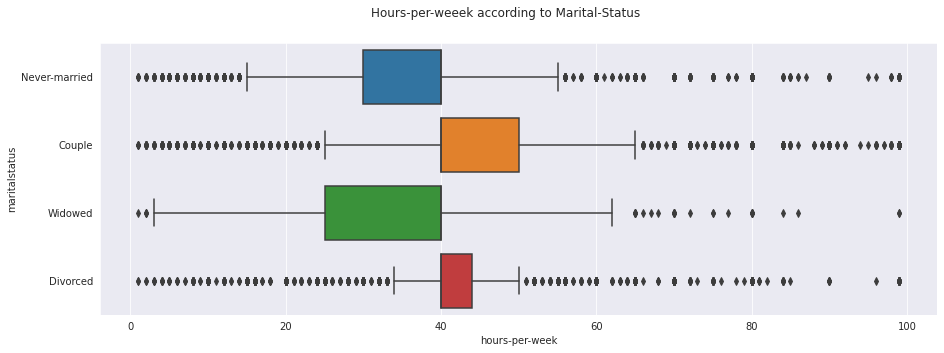

In [837]:
plt.figure(figsize=(15,5))
sns.boxplot(x='hours-per-week',y='maritalstatus',data=mod_df)
plt.suptitle('Hours-per-weeek according to Marital-Status')
plt.show()

### Educational-Num

#### Educational-Num Vs Race

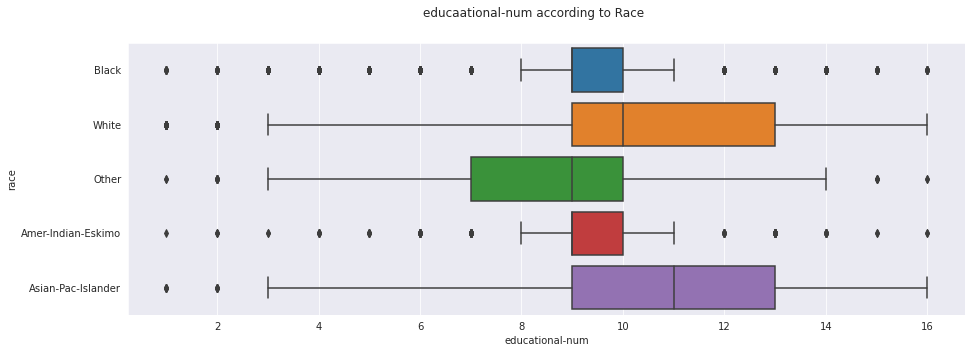

In [838]:
plt.figure(figsize=(15,5))
sns.boxplot(x='educational-num',y='race',data=mod_df)
plt.suptitle('educaational-num according to Race')
plt.show()

## Scatter plots Comparision

#### Educational-Num Vs Age

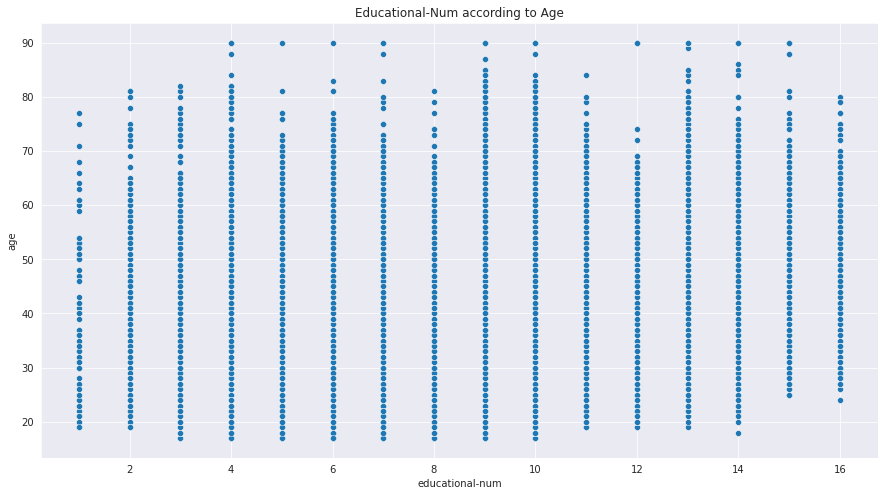

In [839]:
plt.figure(figsize=(15,8))
sns.scatterplot(mod_df['educational-num'],mod_df['age'])
plt.title('Educational-Num according to Age')
plt.show()

#### Education Vs Age

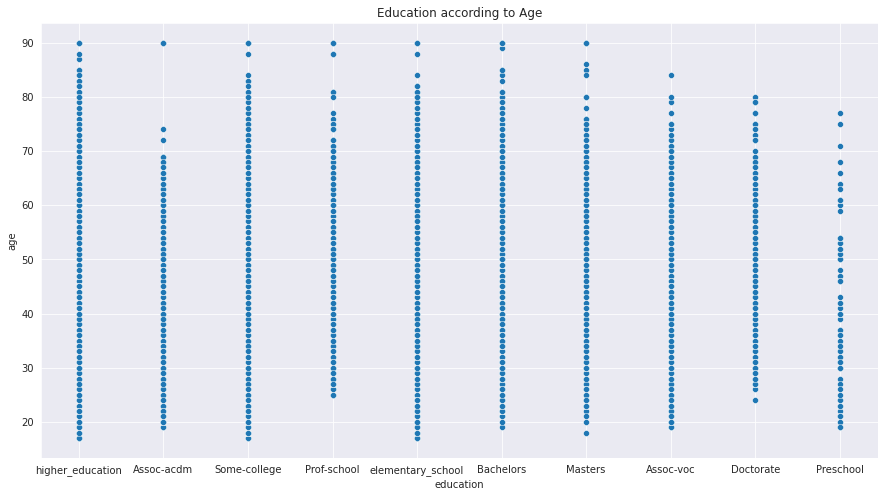

In [840]:
plt.figure(figsize=(15,8))
sns.scatterplot(mod_df['education'],mod_df['age'])
plt.title('Education according to Age')
plt.show()

## Pairplot

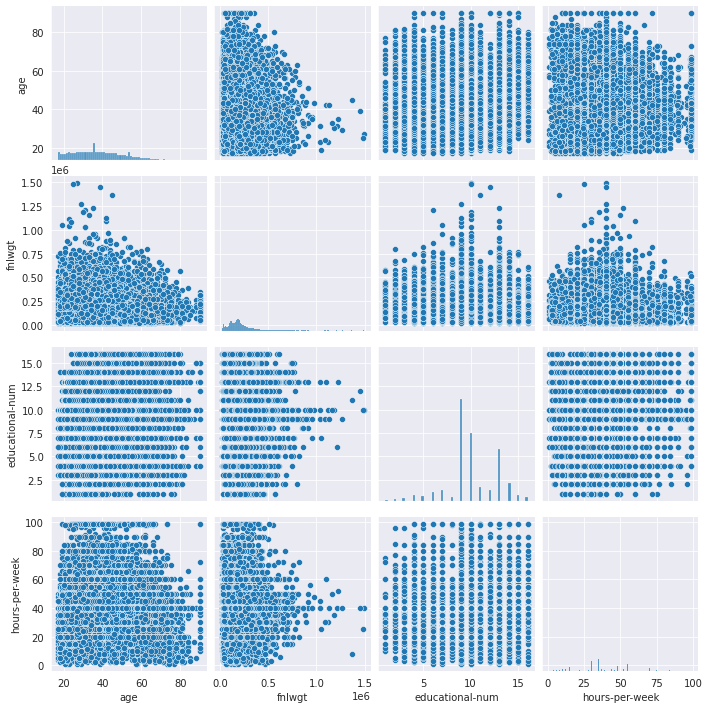

In [841]:
sns.pairplot(mod_df)
plt.show()

## Correlation scores

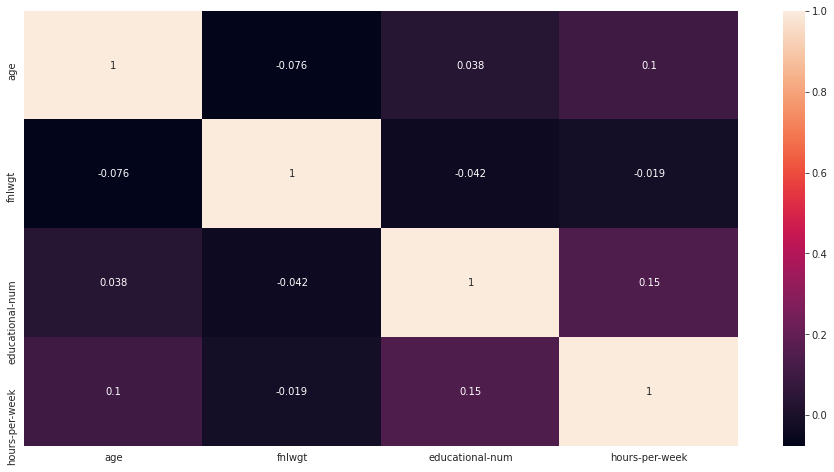

In [842]:
plt.figure(figsize=(16,8))
corrMatrix = mod_df.corr()
sns.heatmap(corrMatrix, annot=True)

# Removing Outliers

## age

In [843]:
age_outliers=i_q_r(mod_df['age'])
print(age_outliers[0])
print(age_outliers[1])


Lower limit is:  -0.5
Upper limit is:  75.5
-0.5
75.5


In [844]:
new=[]
for i in (mod_df['age']):
  if i > age_outliers[0]:
    new.append(i)
mod_df['age']=pd.DataFrame(new)
mod_df['age'].fillna(mod_df['age'].quantile(0.95),inplace=True)

In [845]:
new=[]
for i in (mod_df['age']):
  if i < age_outliers[1]:
    new.append(i)
mod_df['age']=pd.DataFrame(new)
mod_df['age'].fillna(mod_df['age'].quantile(0.05),inplace=True)

In [846]:
mod_df.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,hours-per-week,nativecountry,income
0,25.0,Private,226802,higher_education,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38.0,Private,89814,higher_education,9,Couple,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Couple,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Couple,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,55.0,Private,198693,higher_education,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


### box plot

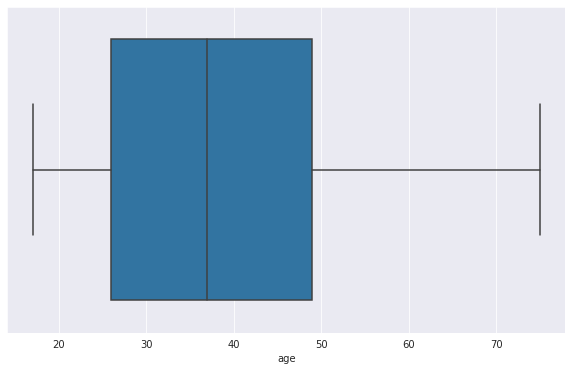

In [847]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['age'])

**Observation:**As we can see outliers are removed.

## fnlwgt

In [848]:
fnlwgt_outliers=i_q_r(mod_df['fnlwgt'])
print(fnlwgt_outliers[0])
print(fnlwgt_outliers[1])


Lower limit is:  -63418.375
Upper limit is:  418732.625
-63418.375
418732.625


In [849]:
new=[]
for i in (mod_df['fnlwgt']):
  if i > fnlwgt_outliers[0]:
    new.append(i)
mod_df['fnlwgt']=pd.DataFrame(new)
mod_df['fnlwgt'].fillna(mod_df['fnlwgt'].quantile(0.95),inplace=True)

In [850]:
new=[]
for i in (mod_df['fnlwgt']):
  if i < fnlwgt_outliers[1]:
    new.append(i)
mod_df['fnlwgt']=pd.DataFrame(new)
mod_df['fnlwgt'].fillna(mod_df['fnlwgt'].quantile(0.05),inplace=True)

In [851]:
mod_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
nativecountry      0
income             0
dtype: int64

#### box plot

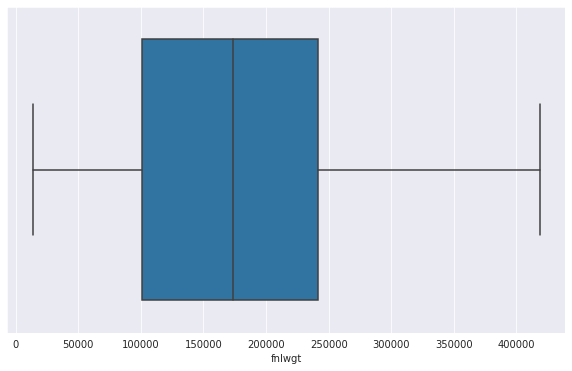

In [852]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['fnlwgt'])

**Observation:**As we can see many of the outliers are removed.

## educational-num

In [853]:
educational_num_outliers=i_q_r(mod_df['educational-num'])
print(educational_num_outliers[0])
print(educational_num_outliers[1])


Lower limit is:  3.0
Upper limit is:  19.0
3.0
19.0


In [854]:
new=[]
for i in (mod_df['educational-num']):
  if i > educational_num_outliers[0]:
    new.append(i)
mod_df['educational-num']=pd.DataFrame(new)
mod_df['educational-num'].fillna(mod_df['educational-num'].quantile(0.95),inplace=True)

In [855]:
new=[]
for i in (mod_df['educational-num']):
  if i < educational_num_outliers[1]:
    new.append(i)
mod_df['educational-num']=pd.DataFrame(new)
mod_df['educational-num'].fillna(mod_df['educational-num'].quantile(0.05),inplace=True)

#### box plot

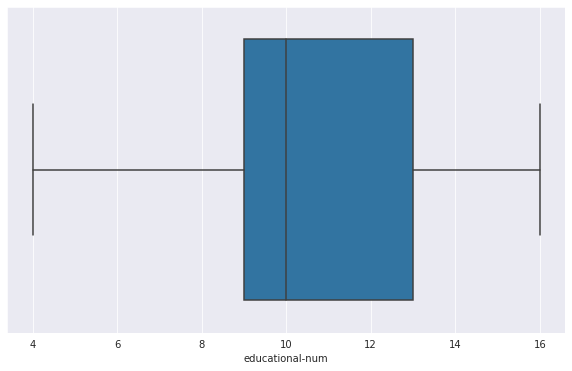

In [856]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['educational-num'])

**Observation:**As we can see all the outliers are removed.

##  hours-per-week

In [857]:
hpw_outliers=i_q_r(mod_df['hours-per-week'])
print(hpw_outliers[0])
print(hpw_outliers[1])


Lower limit is:  32.5
Upper limit is:  52.5
32.5
52.5


In [858]:
new=[]
for i in (mod_df['hours-per-week']):
  if i > hpw_outliers[0]:
    new.append(i)
mod_df['hours-per-week']=pd.DataFrame(new)
mod_df['hours-per-week'].fillna(mod_df['hours-per-week'].quantile(0.95),inplace=True)

In [859]:
new=[]
for i in (mod_df['hours-per-week']):
  if i < age_outliers[1]:
    new.append(i)
mod_df['hours-per-week']=pd.DataFrame(new)
mod_df['hours-per-week'].fillna(mod_df['hours-per-week'].quantile(0.05),inplace=True)
mod_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
nativecountry      0
income             0
dtype: int64

#### box plot

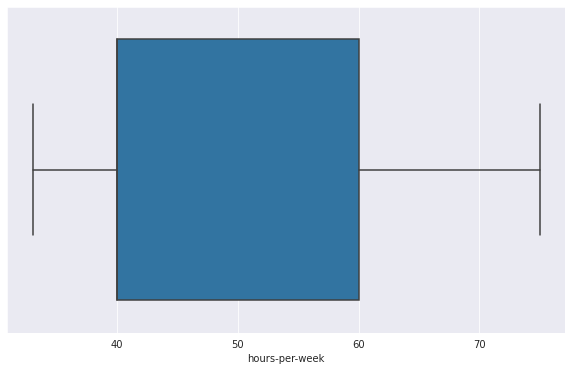

In [860]:
plt.figure(figsize=(10,6))
sns.boxplot(mod_df['hours-per-week'])

**Observation:**As we can see many of the outliers are removed.

In [861]:
mod_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
nativecountry      0
income             0
dtype: int64

In [862]:
mod_df.head()

,age,workclass,fnlwgt,education,educational-num,maritalstatus,occupation,relationship,race,gender,hours-per-week,nativecountry,income
0,25.0,Private,226802.0,higher_education,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K
1,38.0,Private,89814.0,higher_education,9.0,Couple,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Couple,Protective-serv,Husband,White,Male,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Couple,Machine-op-inspct,Husband,Black,Male,40.0,United-States,>50K
5,55.0,Private,104996.0,higher_education,4.0,Never-married,Other-service,Not-in-family,White,Male,39.0,United-States,<=50K


In [863]:
mod_df.shape

(45222, 13)

In [864]:
mod_df.isnull().any(axis=0)

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
maritalstatus      False
occupation         False
relationship       False
race               False
gender             False
hours-per-week     False
nativecountry      False
income             False
dtype: bool

In [865]:
mod_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
nativecountry      0
income             0
dtype: int64

# Encoding categorical data

In [866]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = mod_df.select_dtypes(include=['int64', 'float64'])

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,age,fnlwgt,educational-num,hours-per-week
0,0.137931,0.526418,0.250000,0.166667
1,0.362069,0.188352,0.416667,0.404762
2,0.189655,0.798250,0.666667,0.166667
3,0.465517,0.362358,0.500000,0.166667
4,0.655172,0.225819,0.000000,0.142857


In [867]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

categorical = mod_df.select_dtypes(include=['object'])
df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Assoc-voc,education_Bachelors,education_Doctorate,education_Masters,education_Preschool,education_Prof-school,education_Some-college,education_elementary_school,education_higher_education,maritalstatus_Divorced,maritalstatus_Never-married,maritalstatus_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,...,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [868]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,age,fnlwgt,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Assoc-voc,education_Bachelors,education_Doctorate,education_Masters,education_Preschool,education_Prof-school,education_Some-college,education_elementary_school,education_higher_education,maritalstatus_Divorced,maritalstatus_Never-married,maritalstatus_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,nativecountry_China,nativecountry_Columbia,nativecountry_Cuba,nativecountry_Dominican-Republic,nativecountry_Ecuador,nativecountry_El-Salvador,nativecountry_England,nativecountry_France,nativecountry_Germany,nativecountry_Greece,nativecountry_Guatemala,nativecountry_Haiti,nativecountry_Holand-Netherlands,nativecountry_Honduras,nativecountry_Hong,nativecountry_Hungary,nativecountry_India,nativecountry_Iran,nativecountry_Ireland,nativecountry_Italy,nativecountry_Jamaica,nativecountry_Japan,nativecountry_Laos,nativecountry_Mexico,nativecountry_Nicaragua,nativecountry_Outlying-US(Guam-USVI-etc),nativecountry_Peru,nativecountry_Philippines,nativecountry_Poland,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,income_>50K
0,0.137931,0.526418,0.250000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.362069,0.188352,0.416667,0.404762,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.189655,0.798250,0.666667,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.465517,0.362358,0.500000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.655172,0.225819,0.000000,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Kernel SVM**

## Importing the libraries

In [869]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [870]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [871]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [872]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [873]:
print(X_train)

[[-0.17338735  1.18973974  2.13522365 ...  0.30847962 -0.04174474
  -0.02304354]
 [ 0.45394414 -0.30484887 -0.46620666 ...  0.30847962 -0.04174474
  -0.02304354]
 [-0.52190484  0.81834022 -0.46620666 ...  0.30847962 -0.04174474
  -0.02304354]
 ...
 [-1.28864333 -1.32423199 -1.58110536 ...  0.30847962 -0.04174474
  -0.02304354]
 [-1.28864333 -1.32423199 -1.58110536 ...  0.30847962 -0.04174474
  -0.02304354]
 [-0.10368385  1.42099155  1.02032494 ...  0.30847962 -0.04174474
  -0.02304354]]


## Training the Kernel SVM model on the Training set

In [874]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Making the Confusion Matrix

In [875]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
outcome=[]
a=['kernal-SVM',accuracy_score(y_test,y_pred)]
outcome.append(a)

[[7816  651]
 [1339 1500]]


In [876]:
print(outcome)

[['kernal-SVM', 0.8239872633999646]]


# Decision Tree Classification

## Importing the libraries

In [877]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [878]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [879]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [880]:
print()

## Feature Scaling

In [881]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [882]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Making the Confusion Matrix

In [883]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['Descision_tree_classification',accuracy_score(y_test, y_pred)]
outcome.append(a)

[[7060 1407]
 [1338 1501]]


In [884]:
print(outcome)

[['kernal-SVM', 0.8239872633999646], ['Descision_tree_classification', 0.7572085618255794]]


# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [885]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [886]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [887]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [888]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [889]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making the Confusion Matrix

In [890]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['kNN',accuracy_score(y_test, y_pred)]
outcome.append(a)

[[7536  931]
 [1305 1534]]


# Logistic Regression

## Importing the libraries

In [891]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [892]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [893]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [894]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [895]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making the Confusion Matrix

In [896]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['Logistic_Regression',accuracy_score(y_test, y_pred)]
outcome.append(a)

[[7805  662]
 [1287 1552]]


# Naive Bayes

## Importing the libraries

In [897]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [898]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [899]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [900]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Naive Bayes model on the Training set

In [901]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Making the Confusion Matrix

In [902]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['Naive_bais',accuracy_score(y_test, y_pred)]
outcome.append(a)

[[3578 4889]
 [ 164 2675]]


# Random Forest Classification

## Importing the libraries

In [903]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [904]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [905]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [906]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [907]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Making the Confusion Matrix

In [908]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['random_forest',accuracy_score(y_test, y_pred)]
outcome.append(a)

[[7673  794]
 [1486 1353]]


# Support Vector Machine (SVM)

## Importing the libraries

In [909]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [910]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [911]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [912]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
a=['SVM',accuracy_score(y_test, y_pred)]
outcome.append(a)

In [ ]:
print(outcome)

In [ ]:
a=[]
b=[]
for i in range(len(outcome)):
  a.append(outcome[i][0])
  b.append(outcome[i][1])
print(a)
print(b)

In [ ]:
p='Random Forest Classifier'
print('maximum accuracy is obtained for:',p)
print(max(b))